# Surprise Housing

In [1]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

### 1. Reading and Understanding the Data

In [2]:
# Importing CSV file

house_price = pd.read_csv(r'C:\Users\joshu\Desktop\Studies\upGrad _ Assignment\Advanced Regression Assignment\Workings\train.csv')
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_price.shape

(1460, 81)

In [4]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 2. Data Cleaning

In [7]:
missing_values = ((house_price.isnull().sum()) / len(house_price.index))*100
print(missing_values[missing_values > 0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [8]:
missing_values[missing_values >10].index

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
# Lets drop the columns which has the missing values more than 10%

house_price = house_price.drop(missing_values[missing_values > 10].index, axis = 'columns')

In [10]:
house_price.shape

(1460, 75)

In [11]:
house_price.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [13]:
# Let's look at the aging columns

house_price.iloc[:,[17,18,56,71]]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


In [14]:
# Lets convert the above

def age_convertor(df,col):
    add_col = col + " _ old"
    df[add_col] = df[col].max() - house_price[col]

In [15]:
age_convertor(house_price, 'YearBuilt')
age_convertor(house_price, 'YearRemodAdd')
age_convertor(house_price, 'GarageYrBlt')
age_convertor(house_price, 'YrSold')

In [16]:
house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [17]:
house_price['YearBuilt _ old']

0        7
1       34
2        9
3       95
4       10
        ..
1455    11
1456    32
1457    69
1458    60
1459    45
Name: YearBuilt _ old, Length: 1460, dtype: int64

In [18]:
house_price = house_price.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis = 'columns')

In [19]:
# Lets take a look at other missing values

missing_values = ((house_price.isnull().sum()) / len(house_price.index))*100
print(missing_values[missing_values > 0])

MasVnrType           0.547945
MasVnrArea           0.547945
BsmtQual             2.534247
BsmtCond             2.534247
BsmtExposure         2.602740
BsmtFinType1         2.534247
BsmtFinType2         2.602740
Electrical           0.068493
GarageType           5.547945
GarageFinish         5.547945
GarageQual           5.547945
GarageCond           5.547945
GarageYrBlt _ old    5.547945
dtype: float64


#### Lets Impute the Missing values

In [20]:
# MasVnrType

house_price.MasVnrType.value_counts(dropna = False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [21]:
house_price.MasVnrType.fillna("None", inplace = True)

In [22]:
house_price.MasVnrArea.value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [23]:
house_price.MasVnrArea.mean()

103.68526170798899

In [24]:
house_price.MasVnrArea.fillna(house_price.MasVnrArea.mean(), inplace = True)

In [25]:
# BsmtQual

house_price.BsmtQual.value_counts(dropna = False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [26]:
house_price.BsmtQual.fillna("TA", inplace = True)

In [27]:
# BsmtCond

house_price.BsmtCond.value_counts(dropna = False)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [28]:
house_price.BsmtCond.fillna("TA", inplace = True)

In [29]:
# BsmtExposure

house_price.BsmtExposure.value_counts(dropna = False)

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [30]:
house_price.BsmtExposure.fillna("No", inplace = True)

In [31]:
# BsmtFinType1

house_price.BsmtFinType1.value_counts(dropna = False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [32]:
house_price.BsmtFinType1.fillna("Unf", inplace = True)

In [33]:
# BsmtFinType2

house_price.BsmtFinType2.value_counts(dropna = False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [34]:
house_price.BsmtFinType2.fillna("Unf", inplace = True)

In [35]:
# Electrical

house_price.Electrical.value_counts(dropna = False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [36]:
house_price.Electrical.fillna("SBrkr", inplace = True)

In [37]:
# GarageType

house_price.GarageType.value_counts(dropna = False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [38]:
house_price.GarageType.fillna("Unf", inplace = True)

In [39]:
# GarageFinish

house_price.GarageFinish.value_counts(dropna = False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

In [40]:
house_price.GarageFinish.fillna("Unf", inplace = True)

In [41]:
# GarageQual

house_price.GarageQual.value_counts(dropna = False)

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [42]:
house_price.GarageQual.fillna("TA", inplace = True)

In [43]:
# GarageCond

house_price.GarageCond.value_counts(dropna = False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [44]:
house_price.GarageCond.fillna("TA", inplace = True)

In [45]:
# GarageYrBlt _ old

house_price["GarageYrBlt _ old"].value_counts(dropna = False)

NaN      81
5.0      65
4.0      59
6.0      53
7.0      50
         ..
83.0      1
110.0     1
104.0     1
102.0     1
77.0      1
Name: GarageYrBlt _ old, Length: 98, dtype: int64

In [46]:
house_price["GarageYrBlt _ old"].fillna(-1, inplace = True)

In [47]:
# Lets drop the columns which are not relevant

house_price = house_price.drop(['Id', 'Utilities', 'Street'], axis = 'columns')

### 3. Exploratory Data Analysis

In [48]:
num_cols = house_price.select_dtypes(include = np.number).columns.tolist()

In [49]:
num_cols.remove('SalePrice')
num_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YearBuilt _ old',
 'YearRemodAdd _ old',
 'GarageYrBlt _ old',
 'YrSold _ old']

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

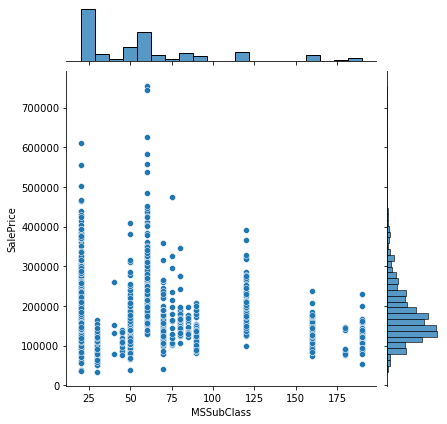

<Figure size 1440x1872 with 0 Axes>

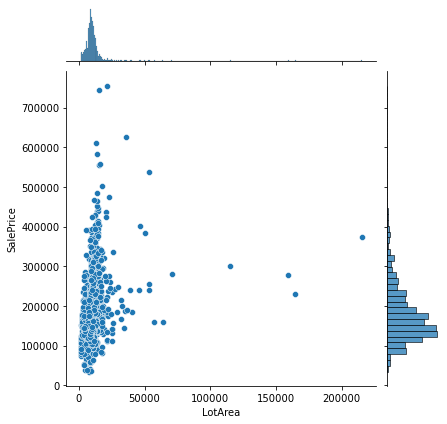

<Figure size 1440x1872 with 0 Axes>

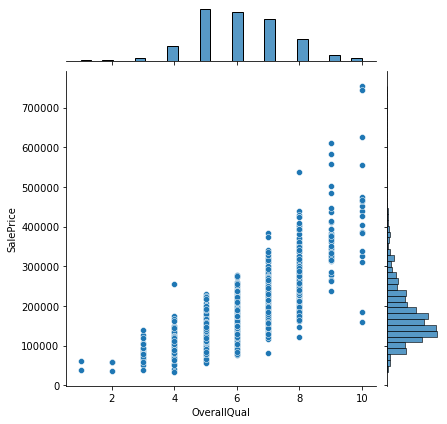

<Figure size 1440x1872 with 0 Axes>

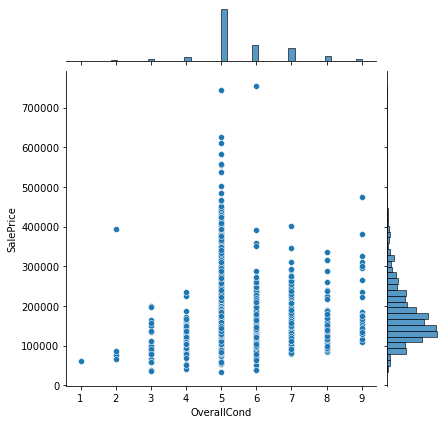

<Figure size 1440x1872 with 0 Axes>

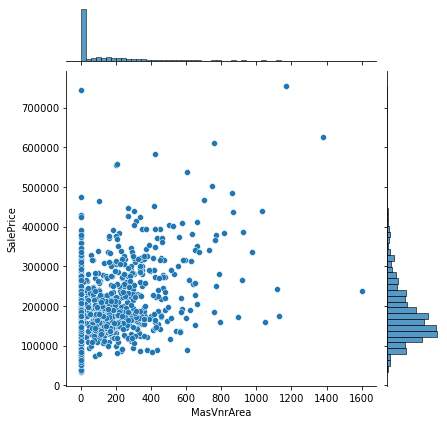

<Figure size 1440x1872 with 0 Axes>

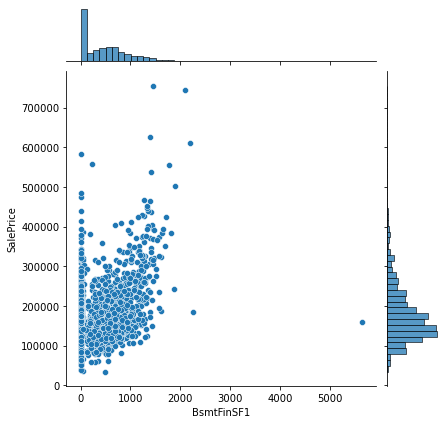

<Figure size 1440x1872 with 0 Axes>

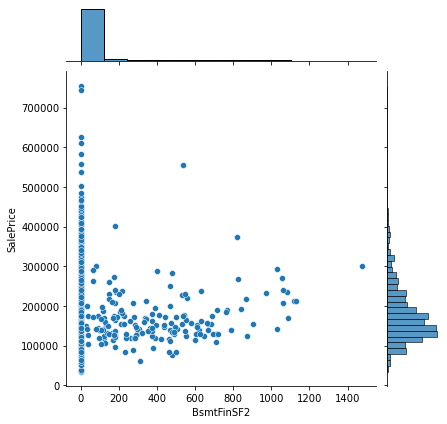

<Figure size 1440x1872 with 0 Axes>

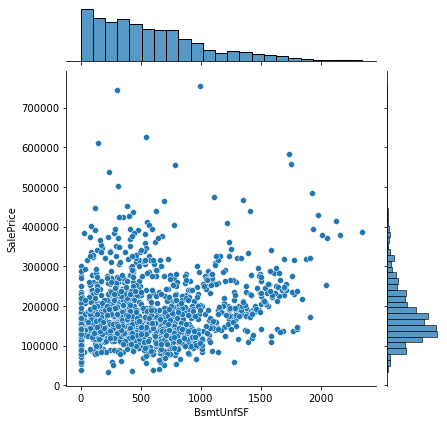

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

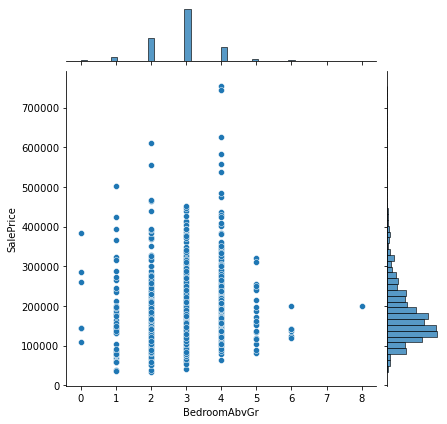

<Figure size 1440x1872 with 0 Axes>

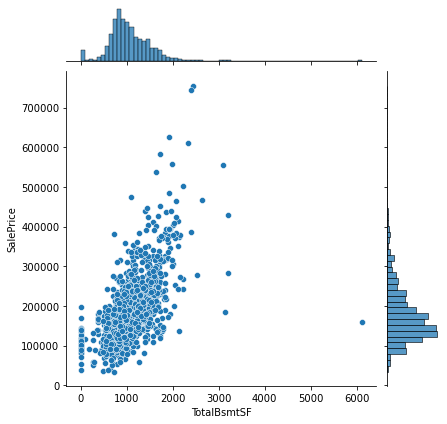

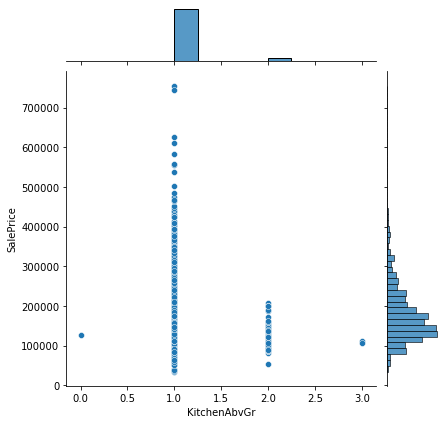

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

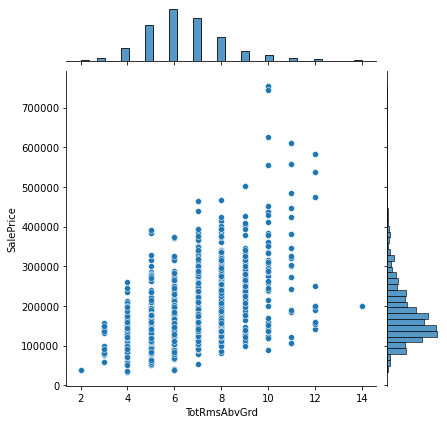

<Figure size 1440x1872 with 0 Axes>

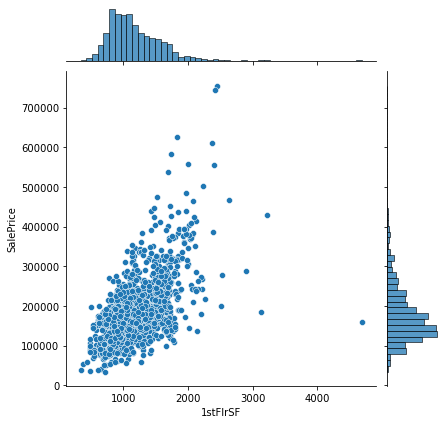

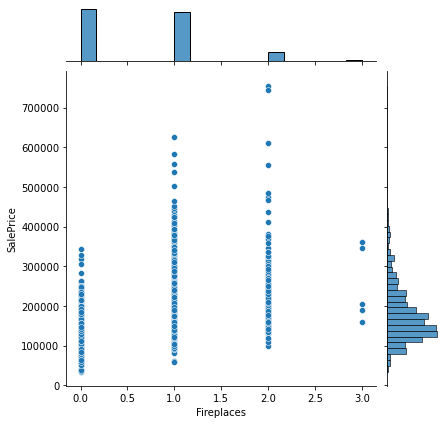

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

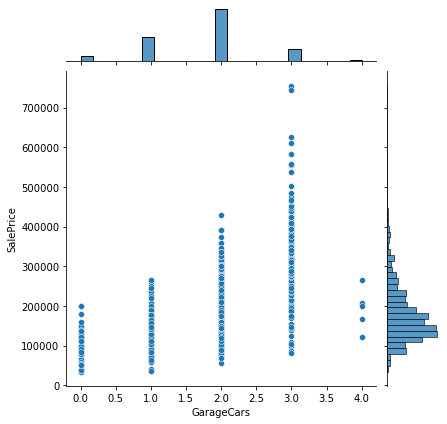

<Figure size 1440x1872 with 0 Axes>

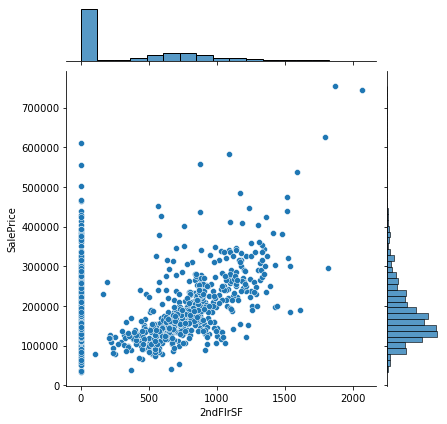

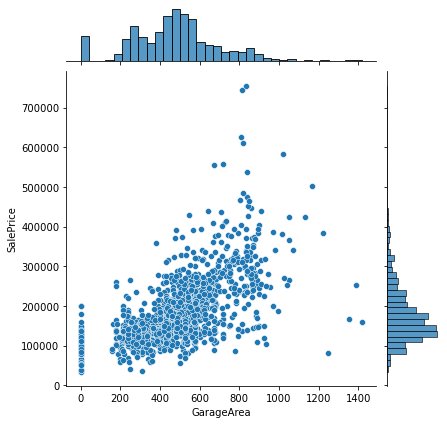

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

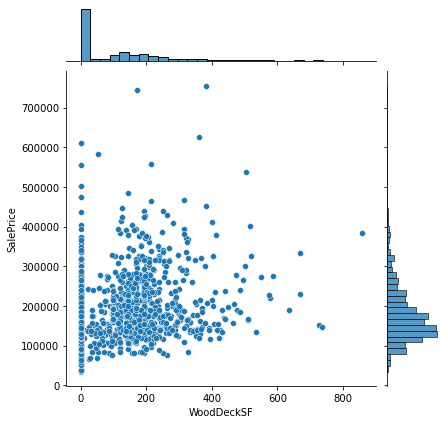

<Figure size 1440x1872 with 0 Axes>

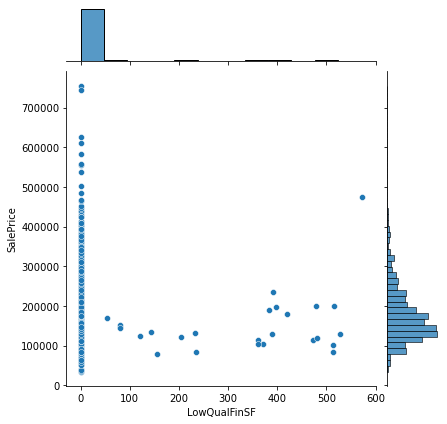

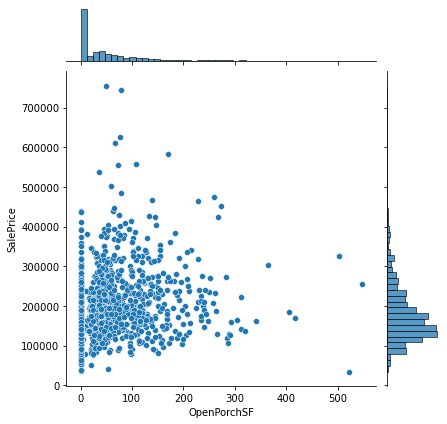

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

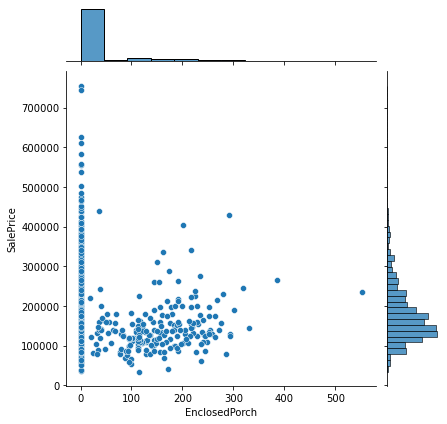

<Figure size 1440x1872 with 0 Axes>

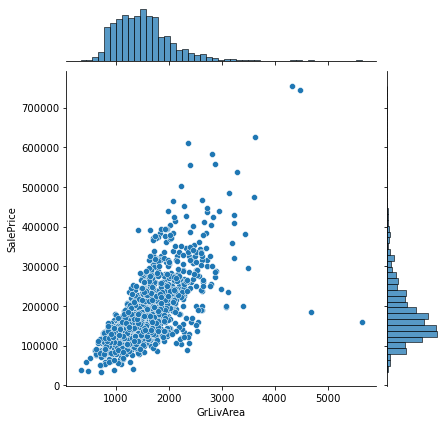

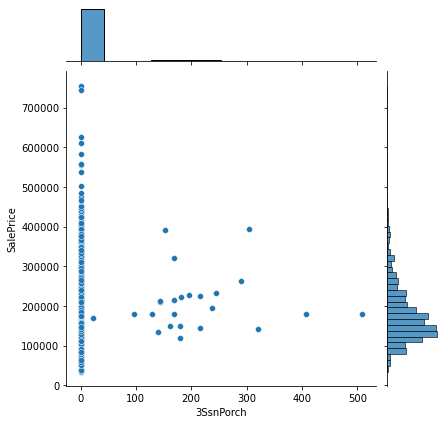

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

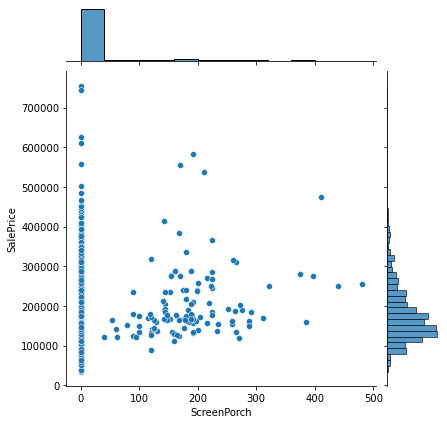

<Figure size 1440x1872 with 0 Axes>

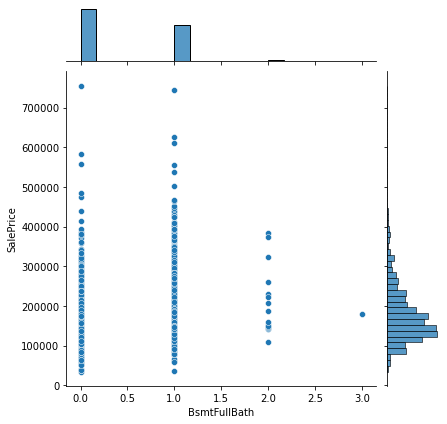

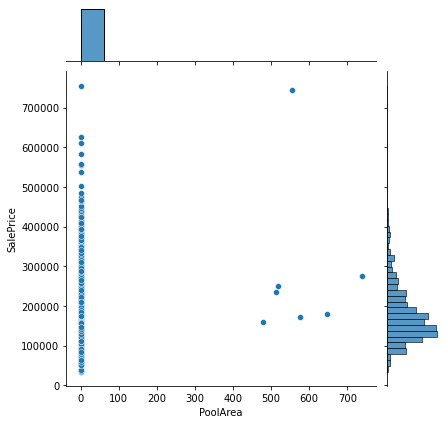

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

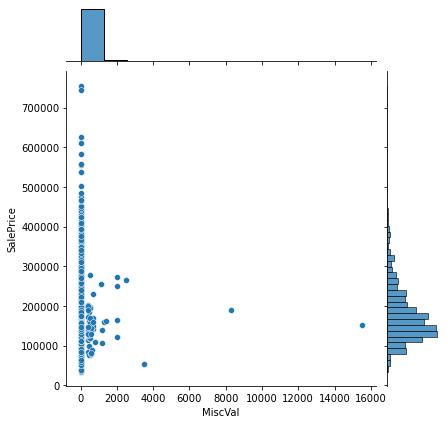

<Figure size 1440x1872 with 0 Axes>

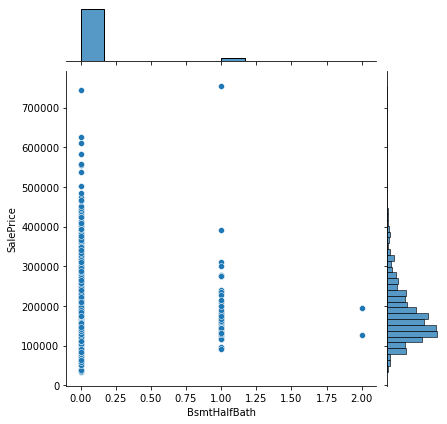

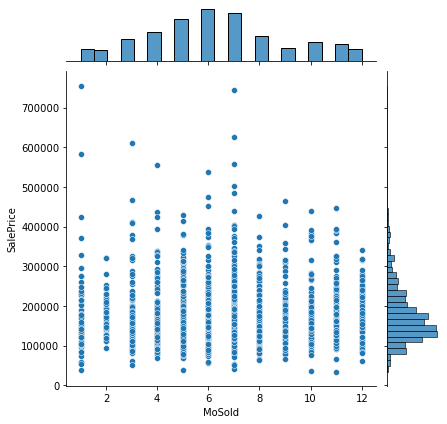

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

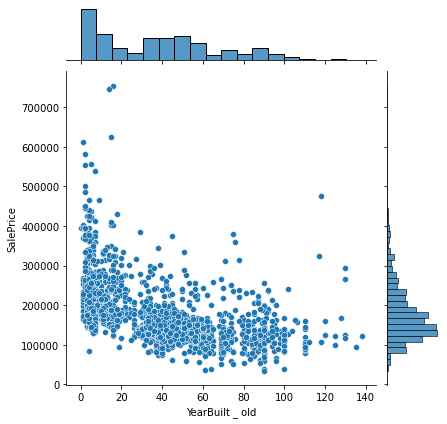

<Figure size 1440x1872 with 0 Axes>

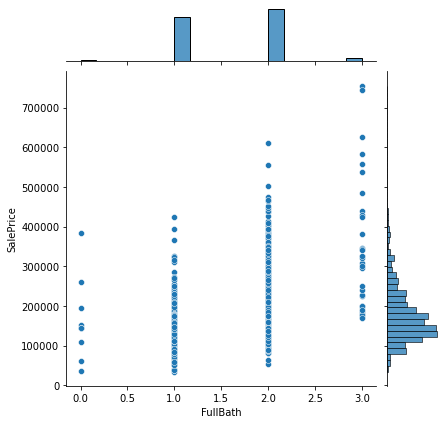

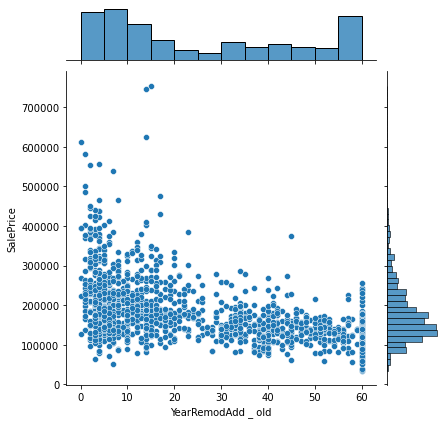

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

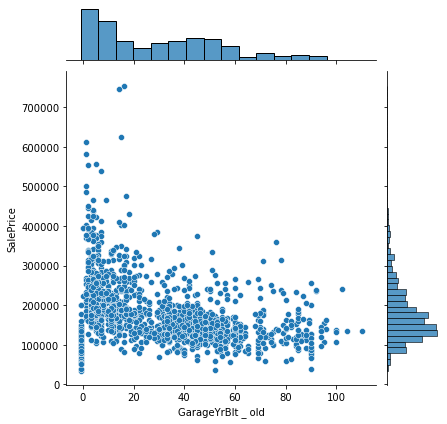

<Figure size 1440x1872 with 0 Axes>

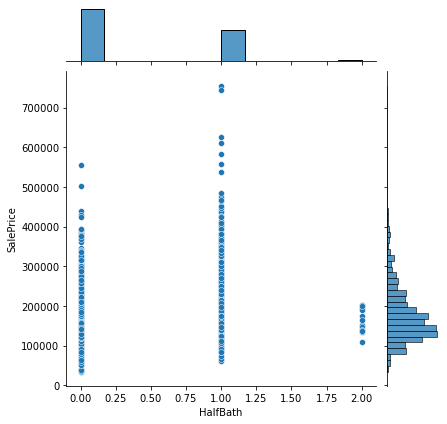

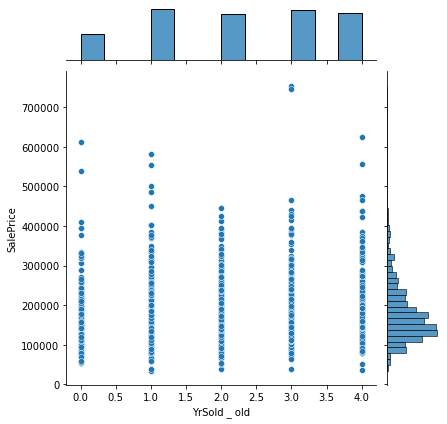

In [50]:
# lets plot them

for index, col in enumerate(num_cols):
    plt.figure(figsize = (20,26))
    plt.figure(index)
    sns.jointplot(x = col, y = 'SalePrice', data = house_price[[col, 'SalePrice']])

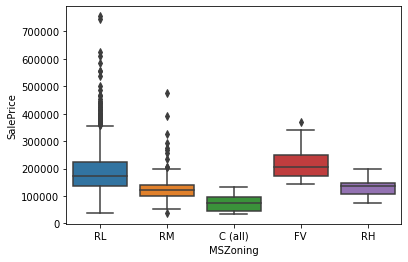

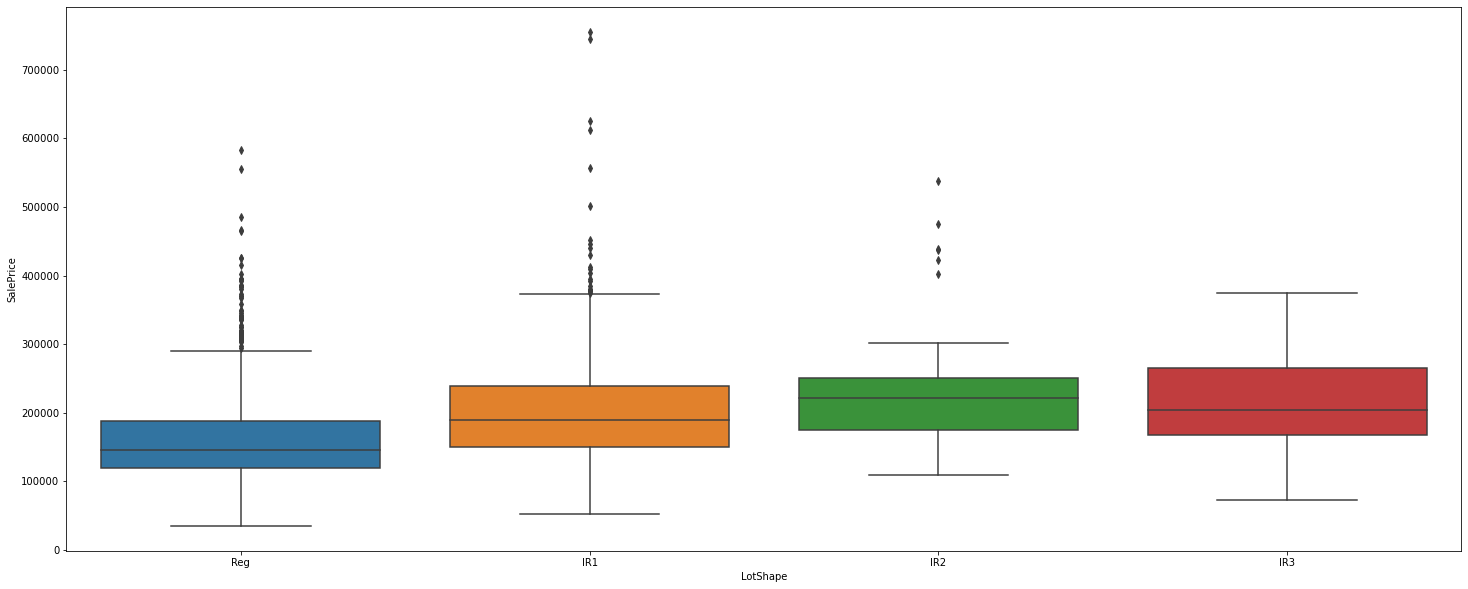

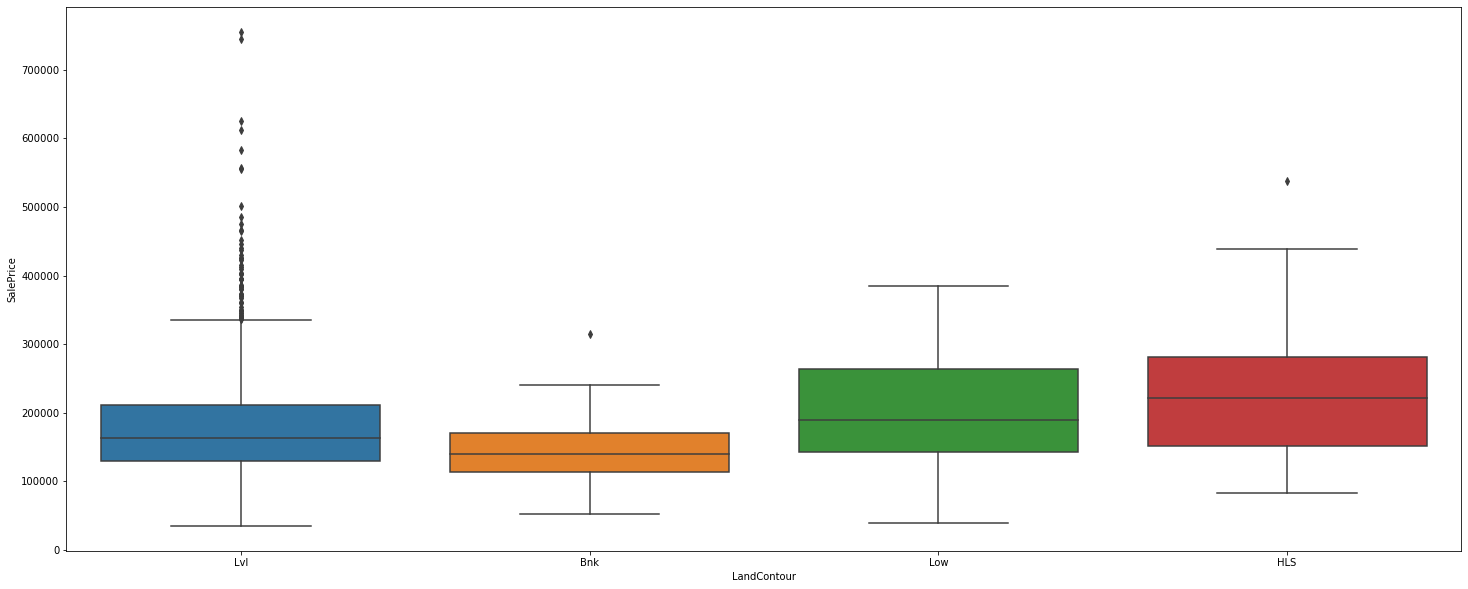

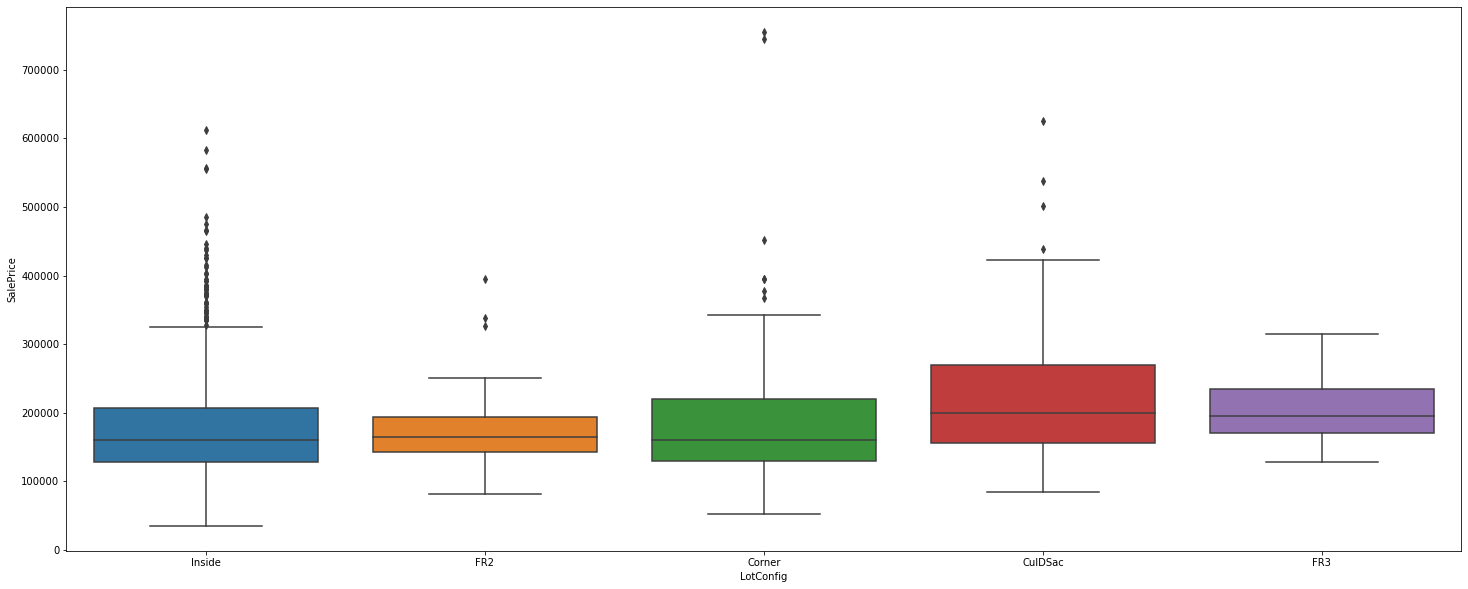

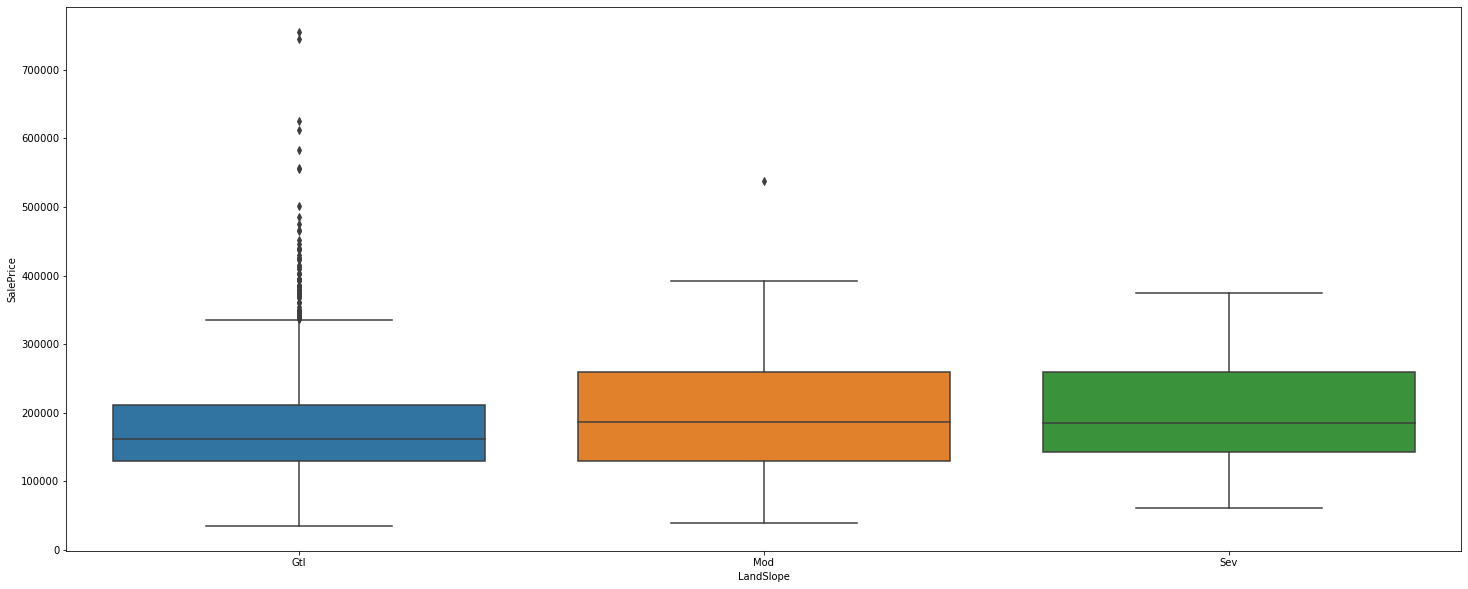

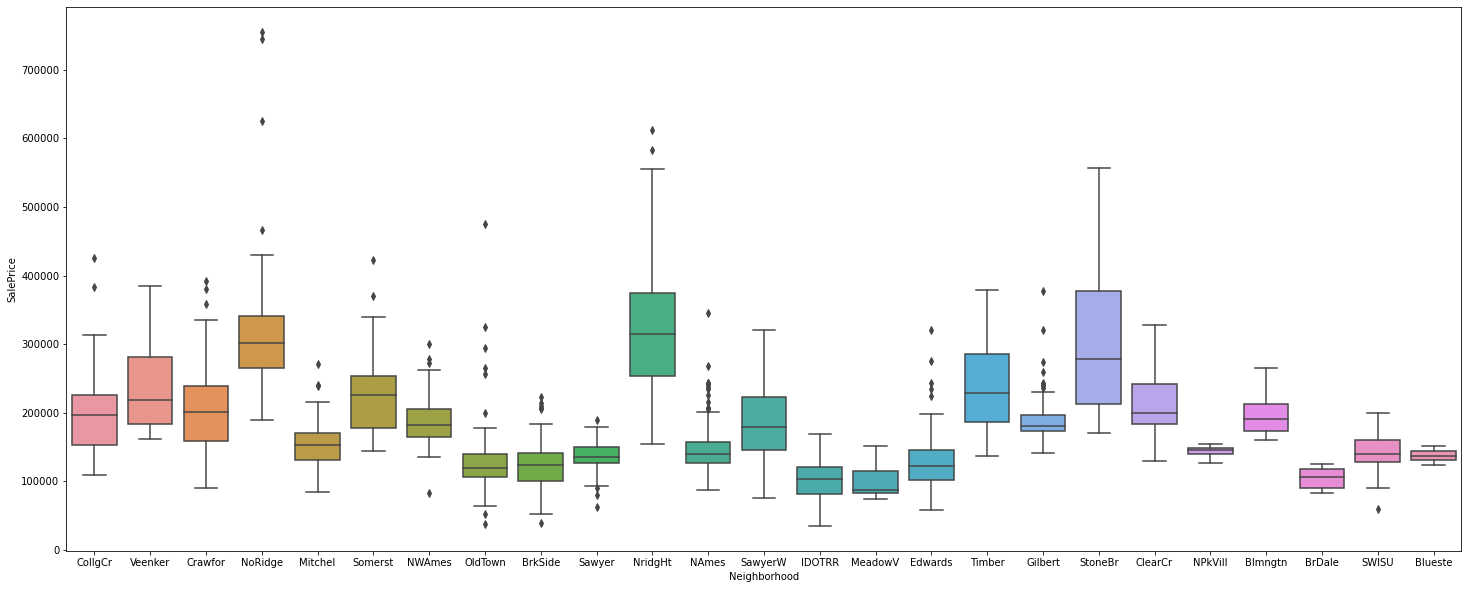

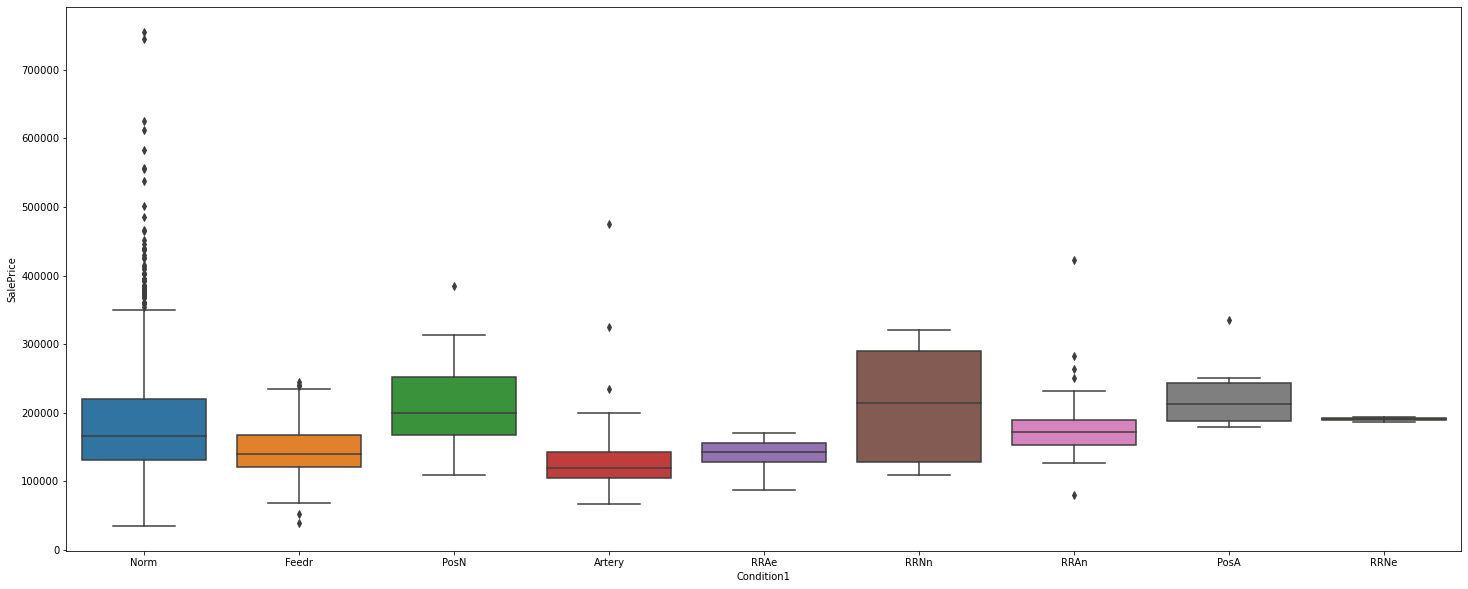

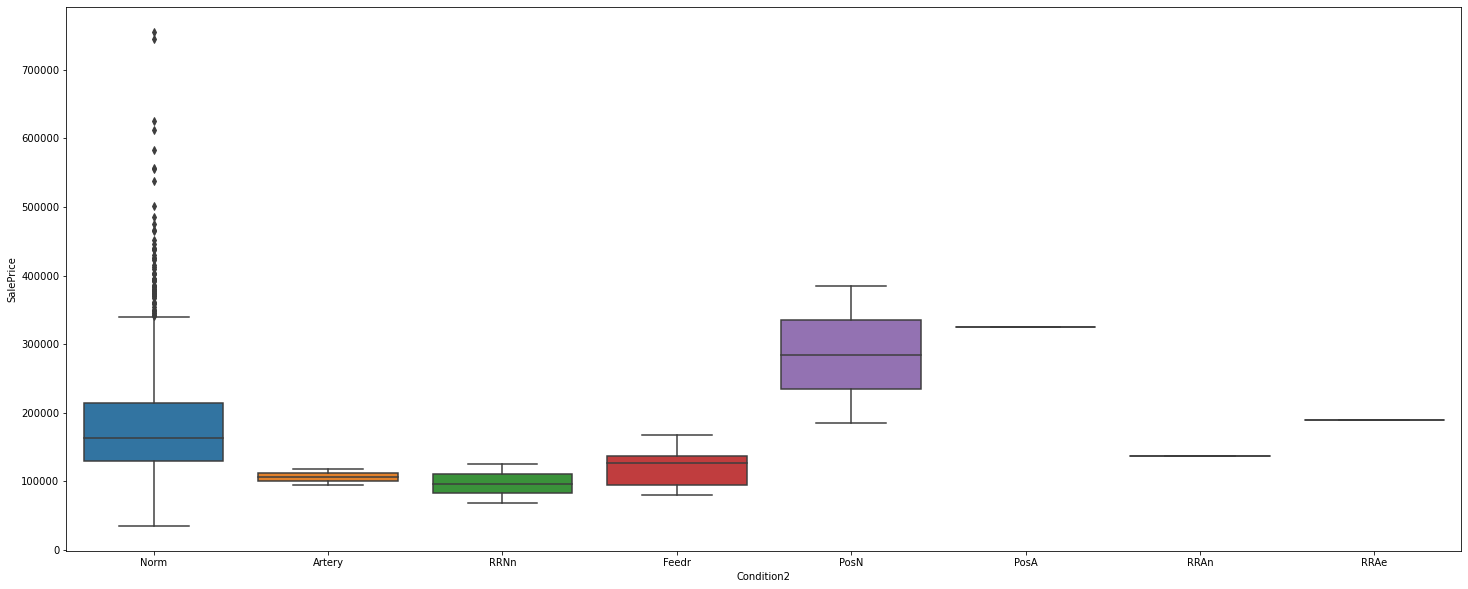

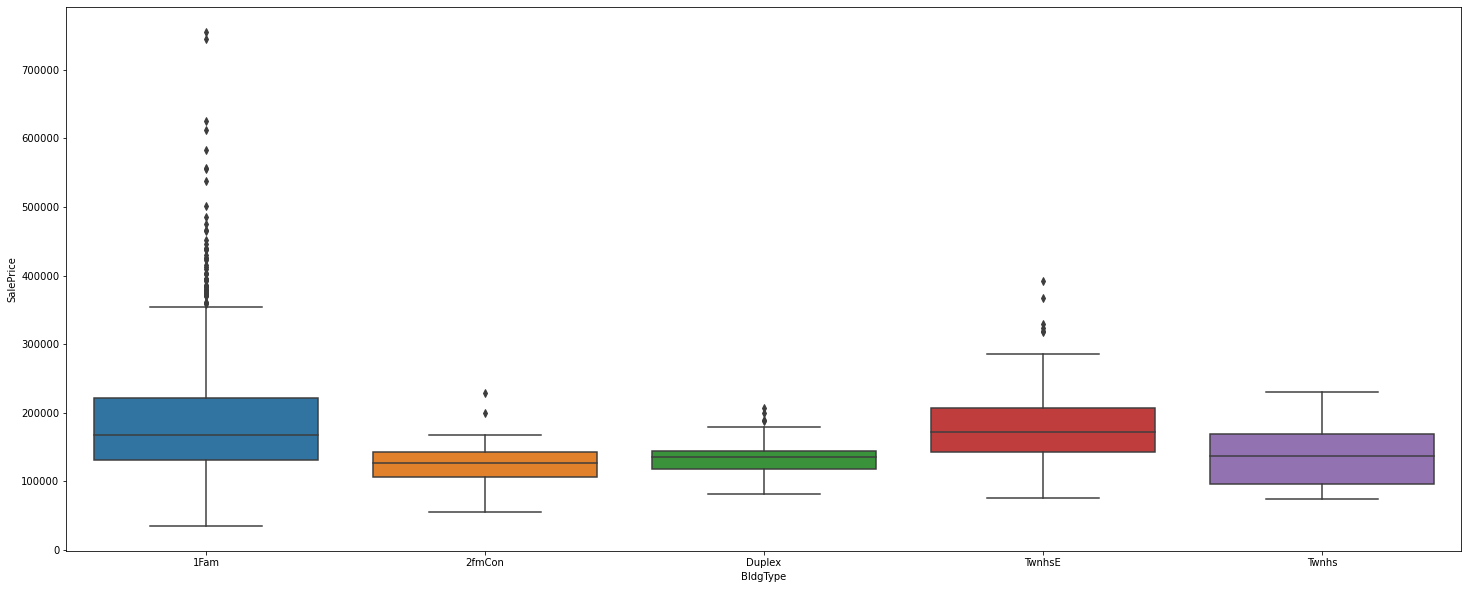

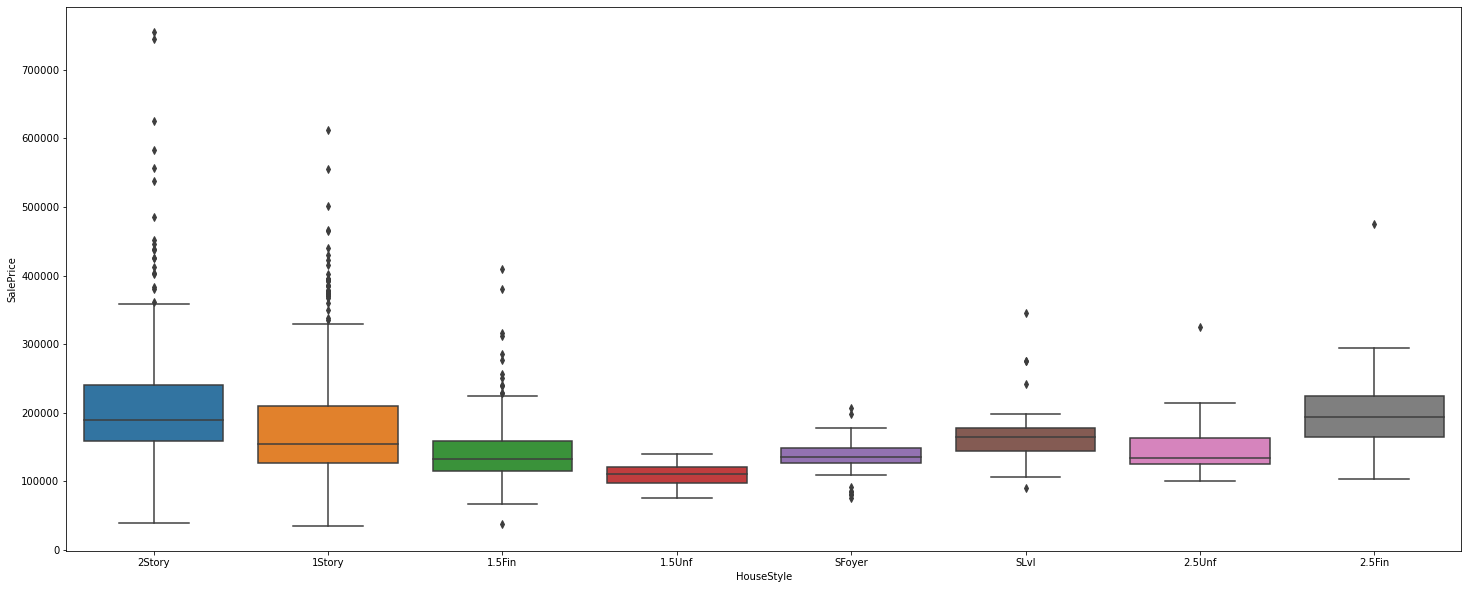

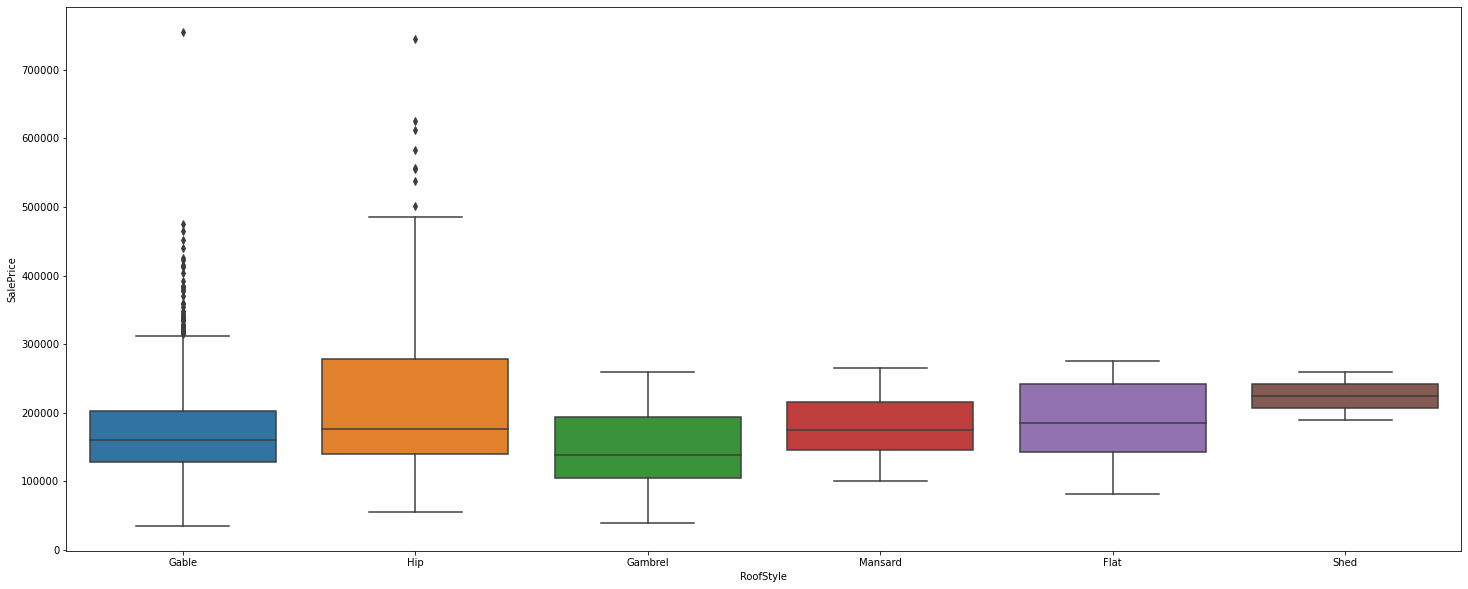

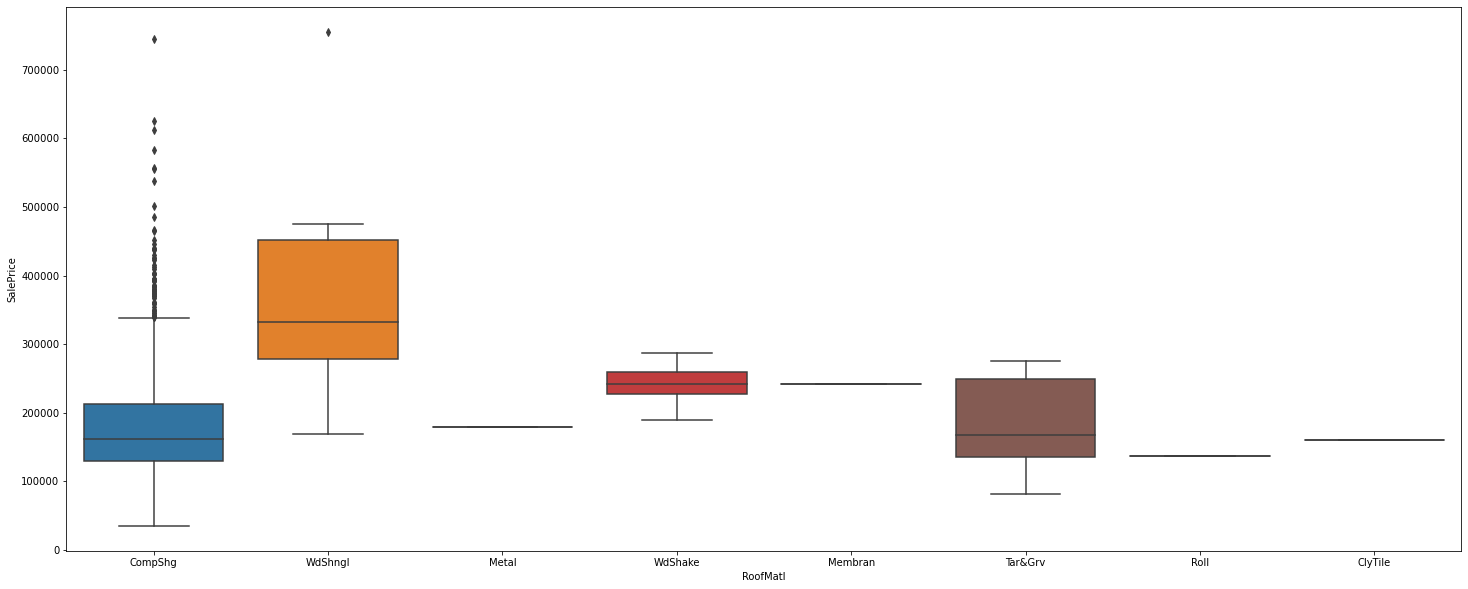

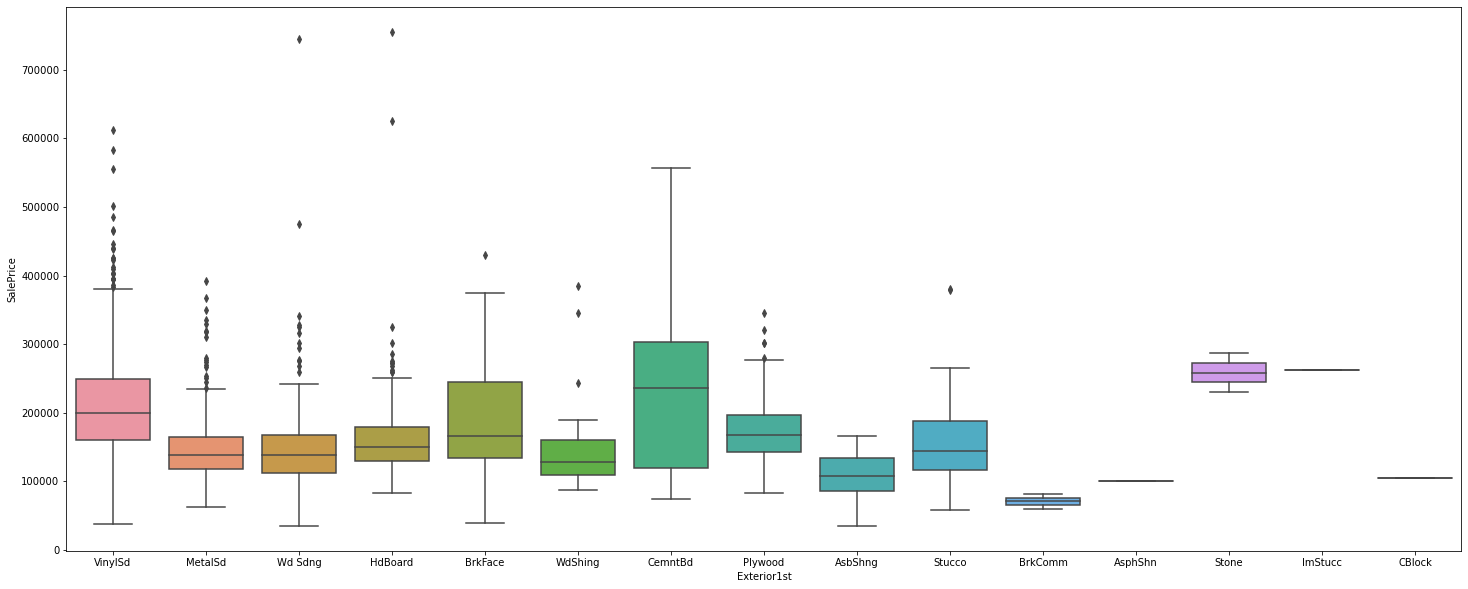

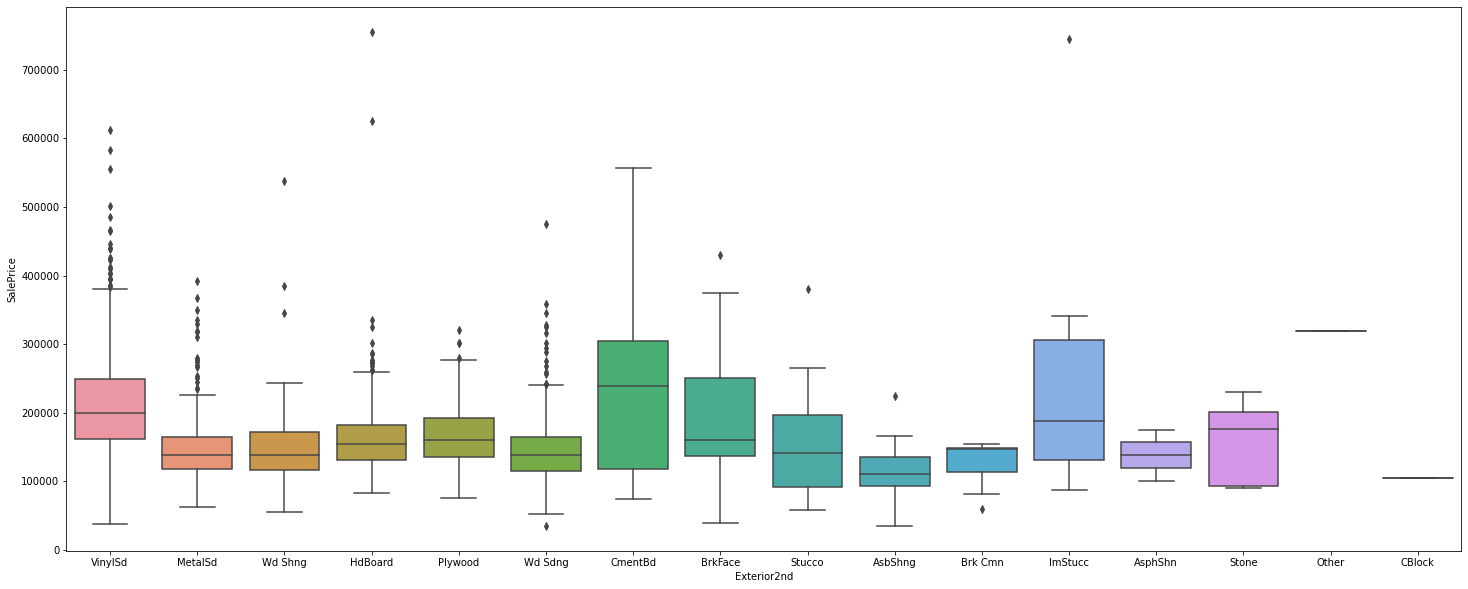

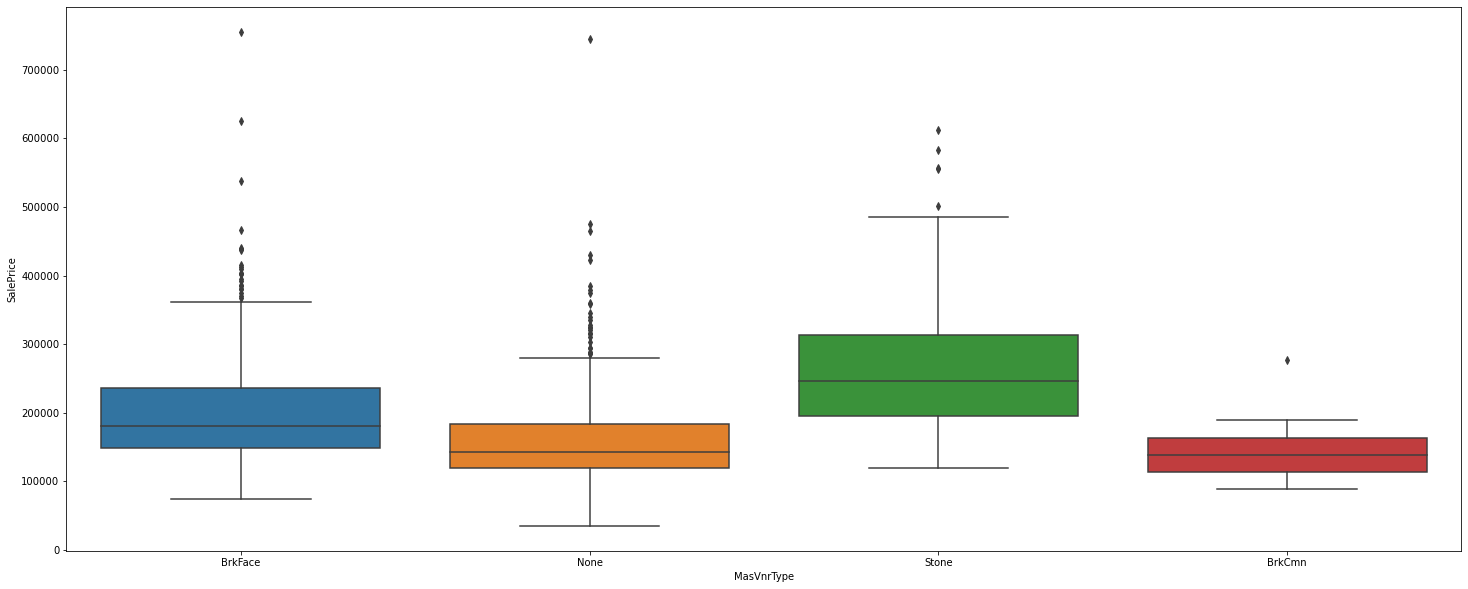

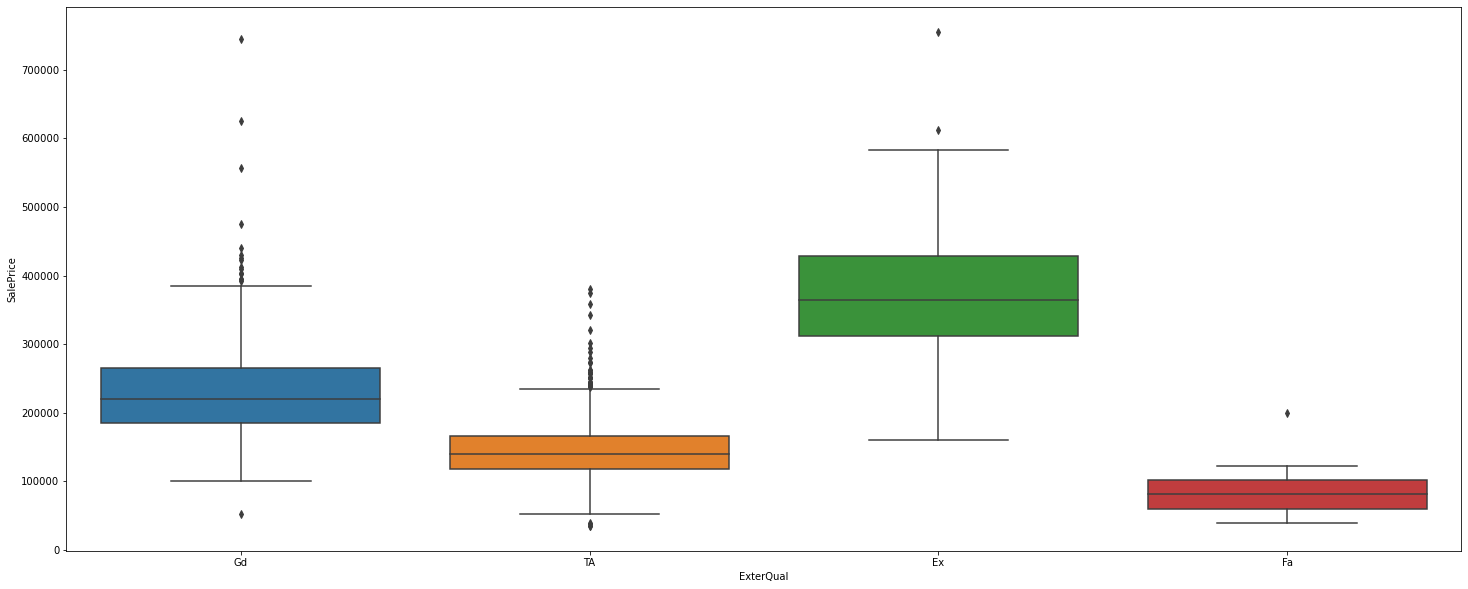

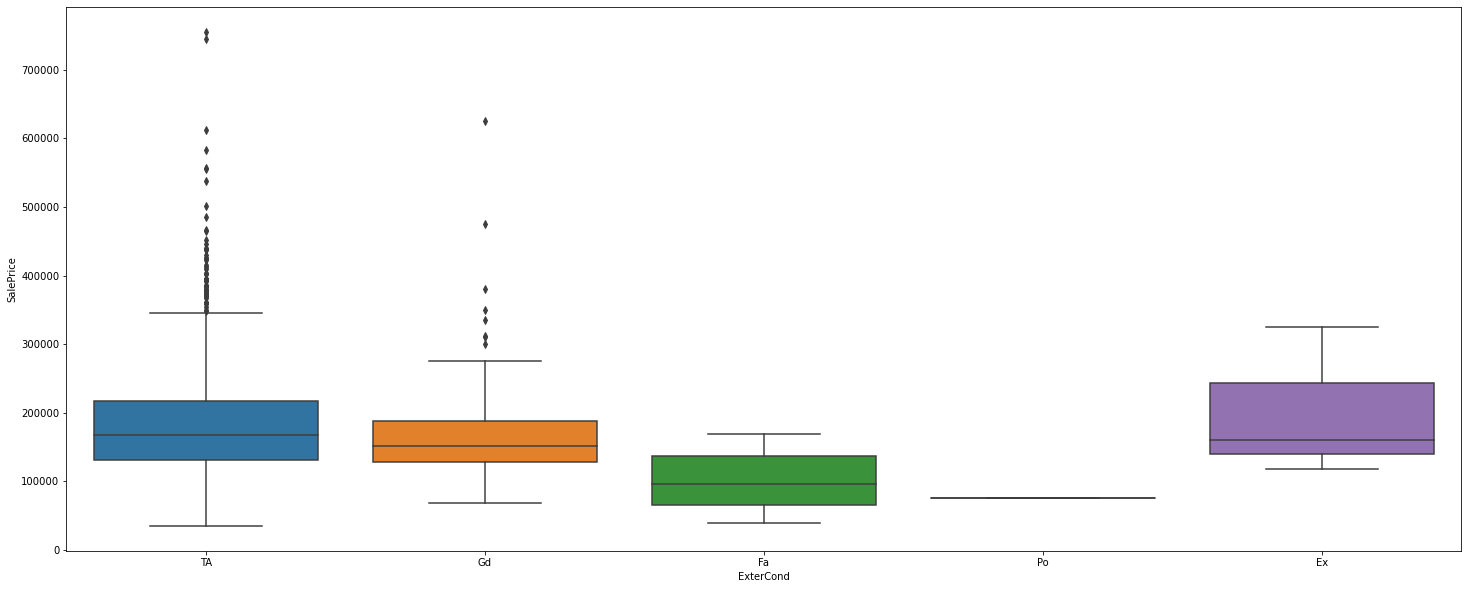

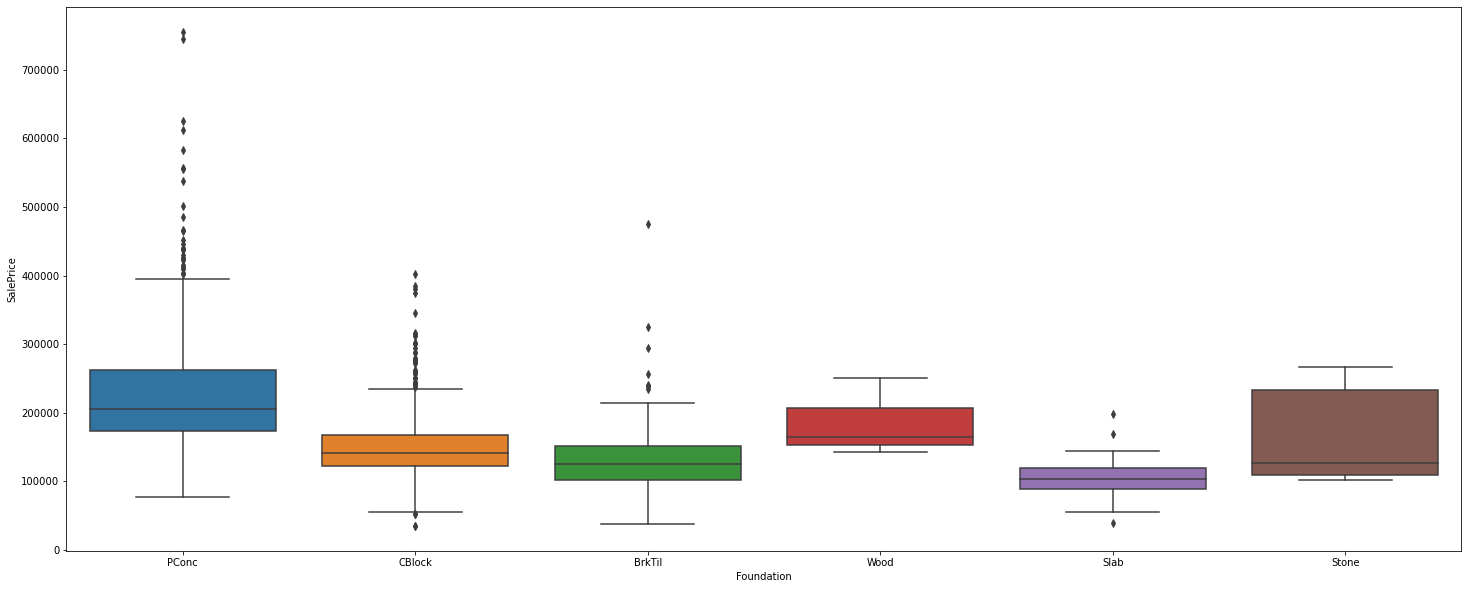

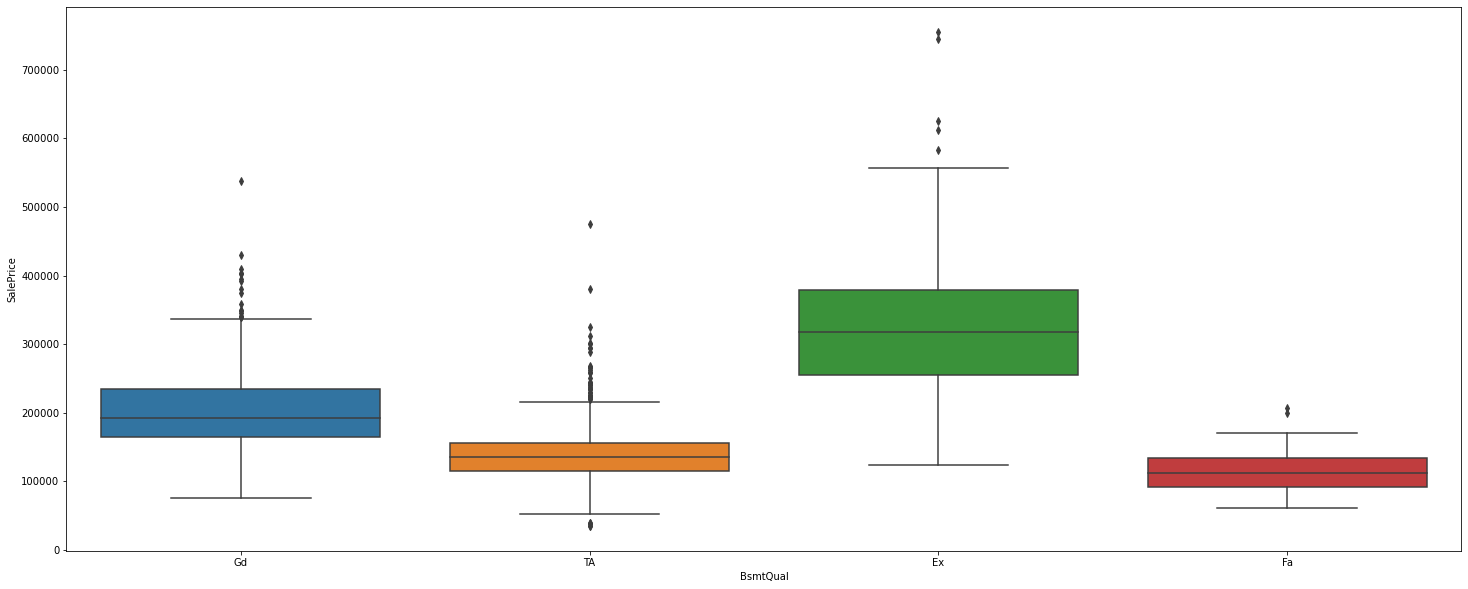

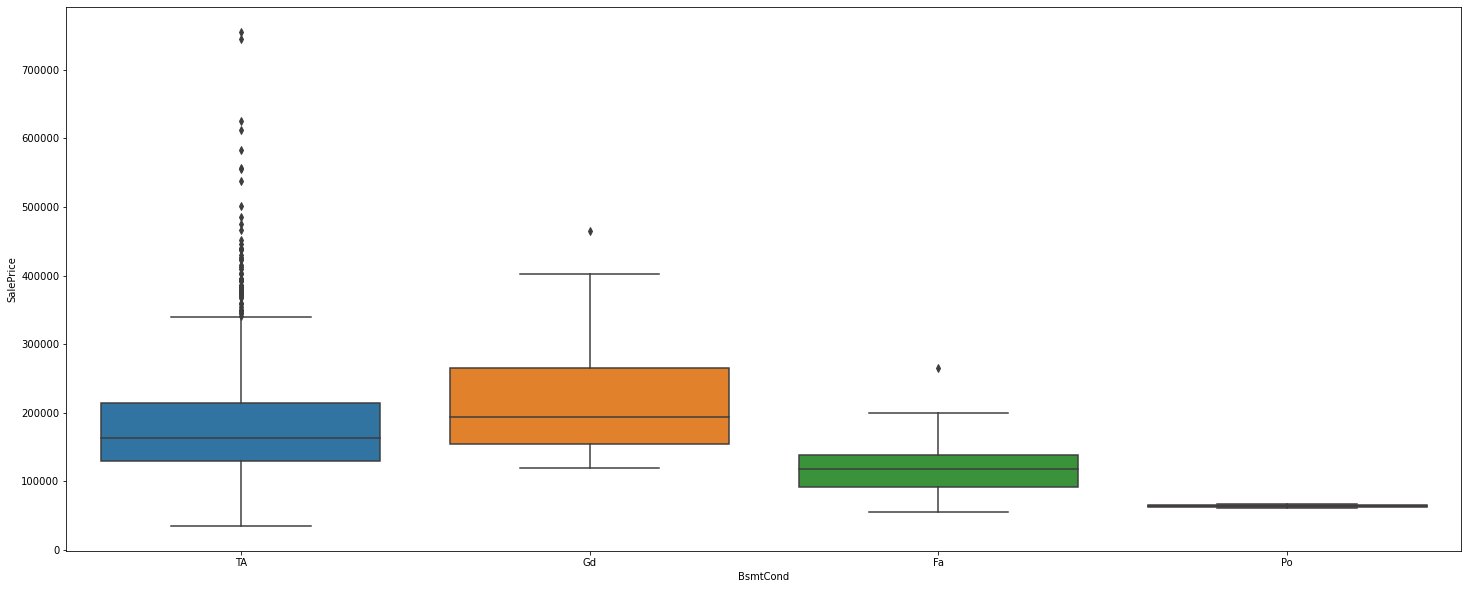

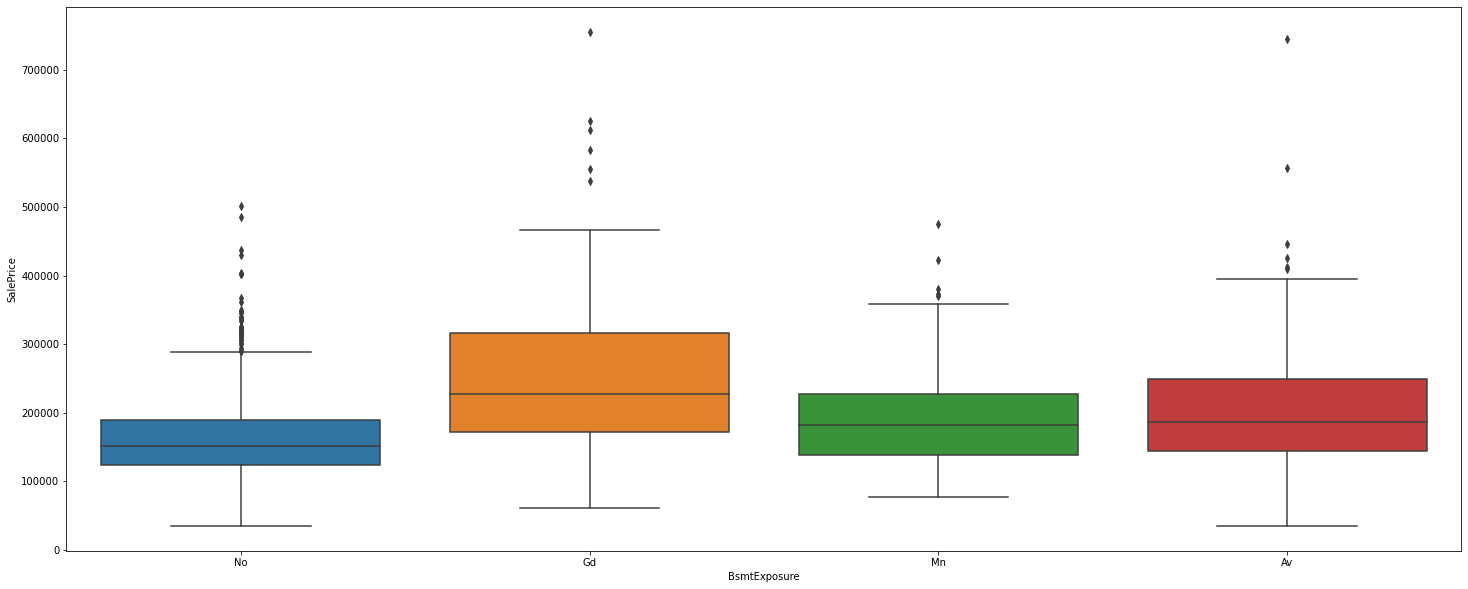

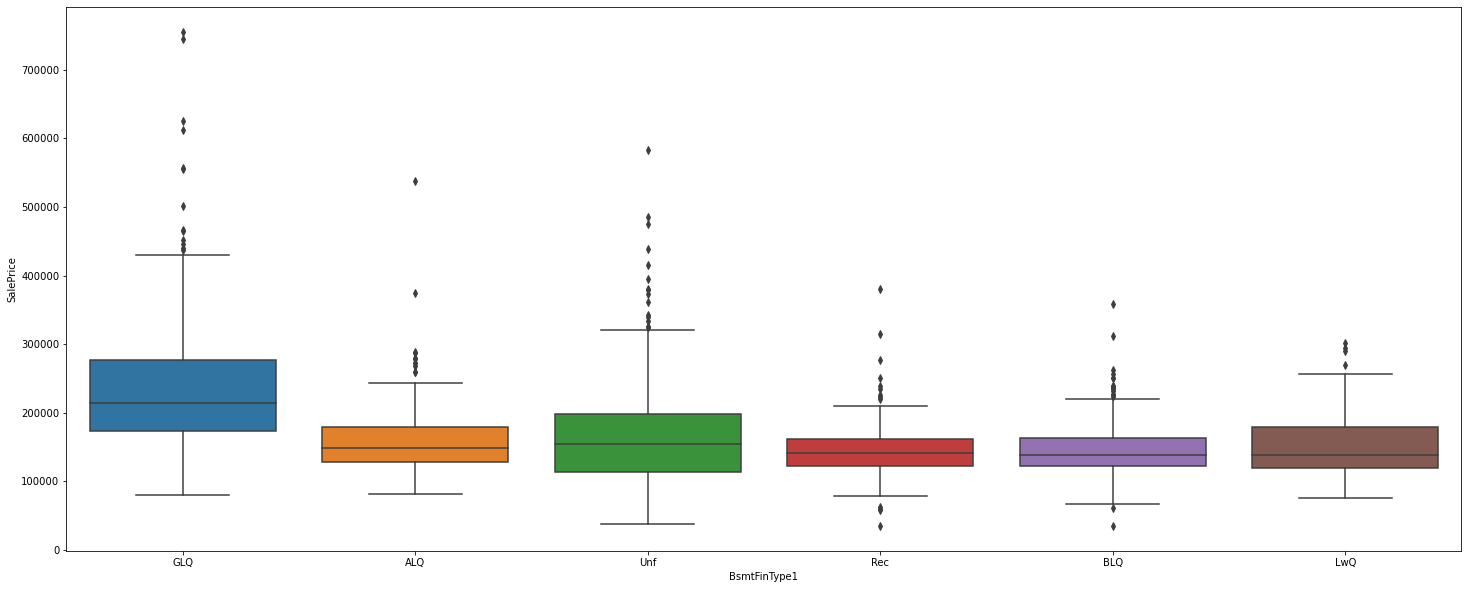

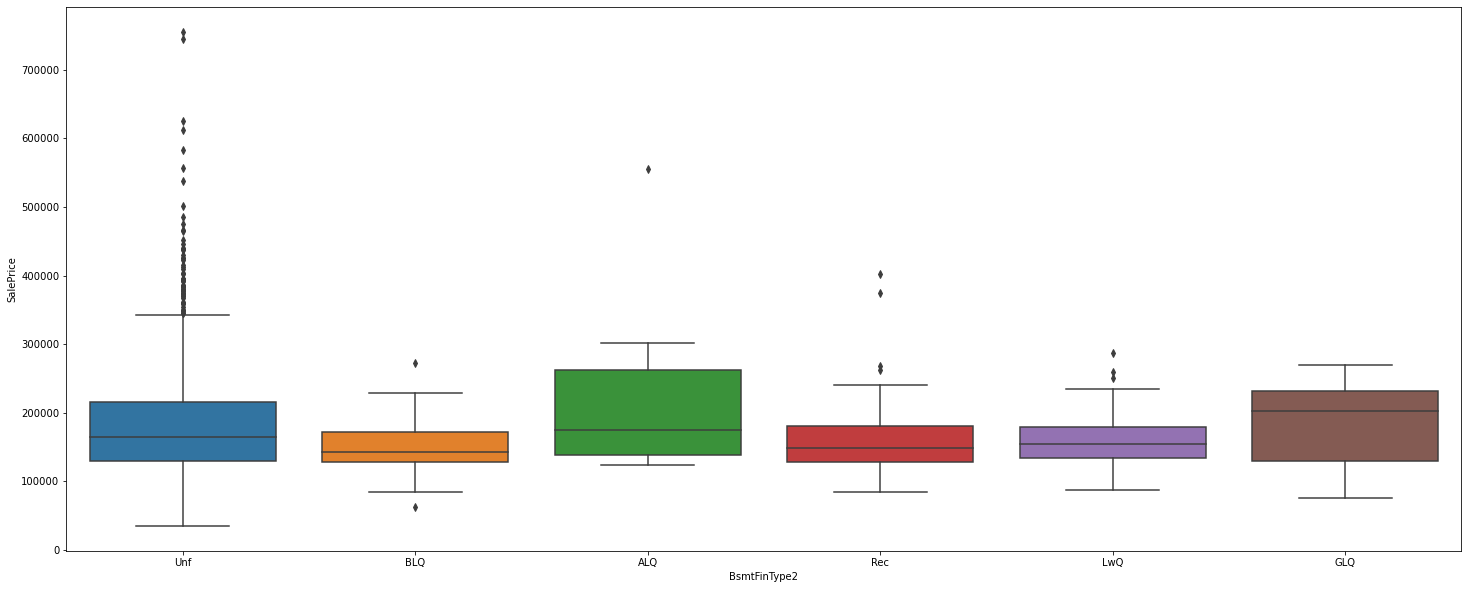

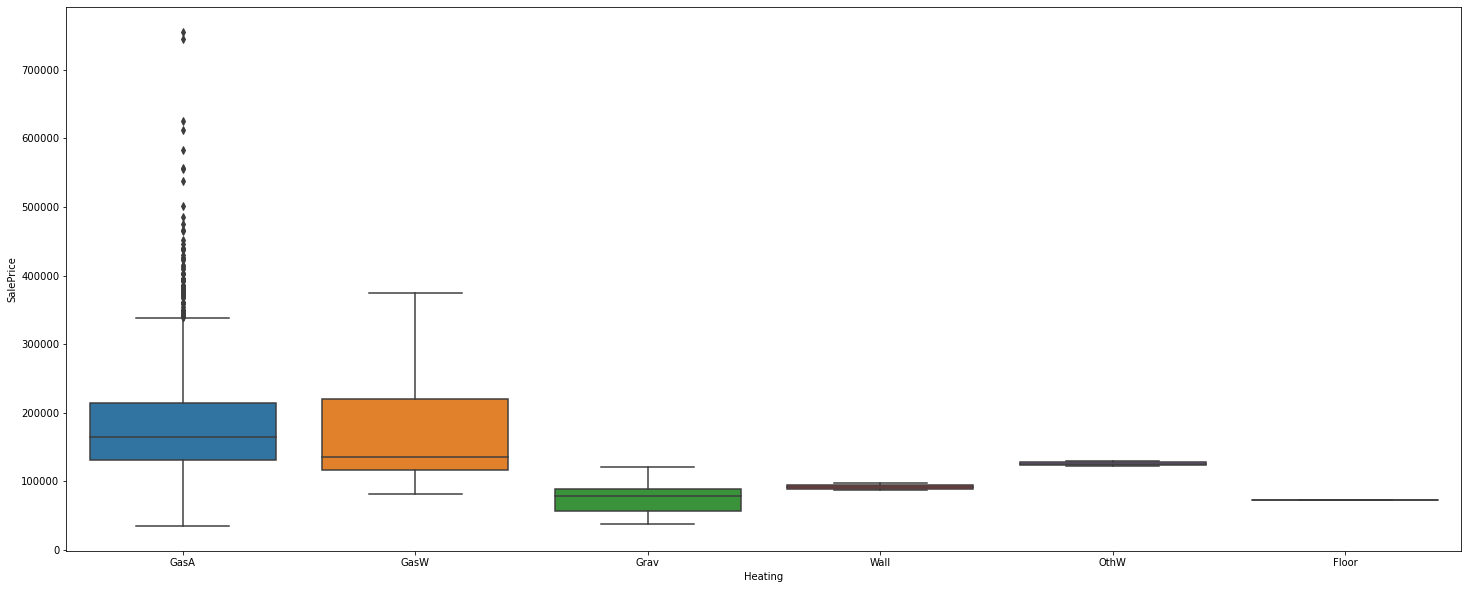

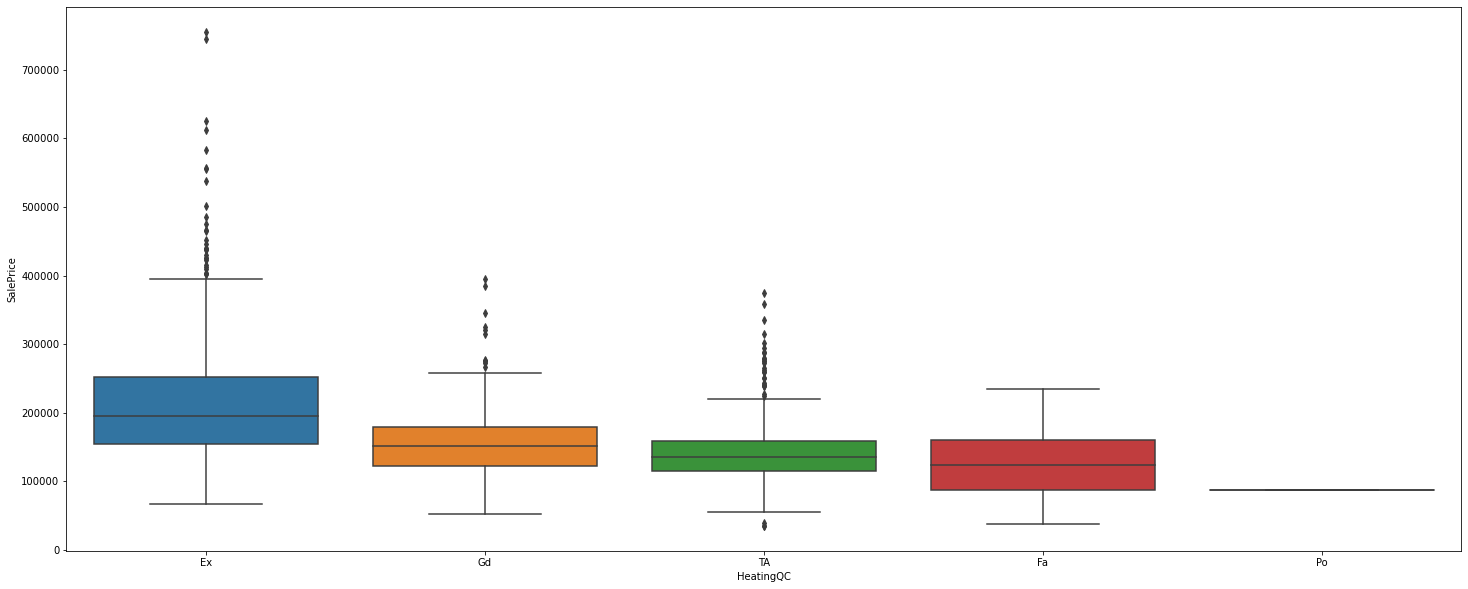

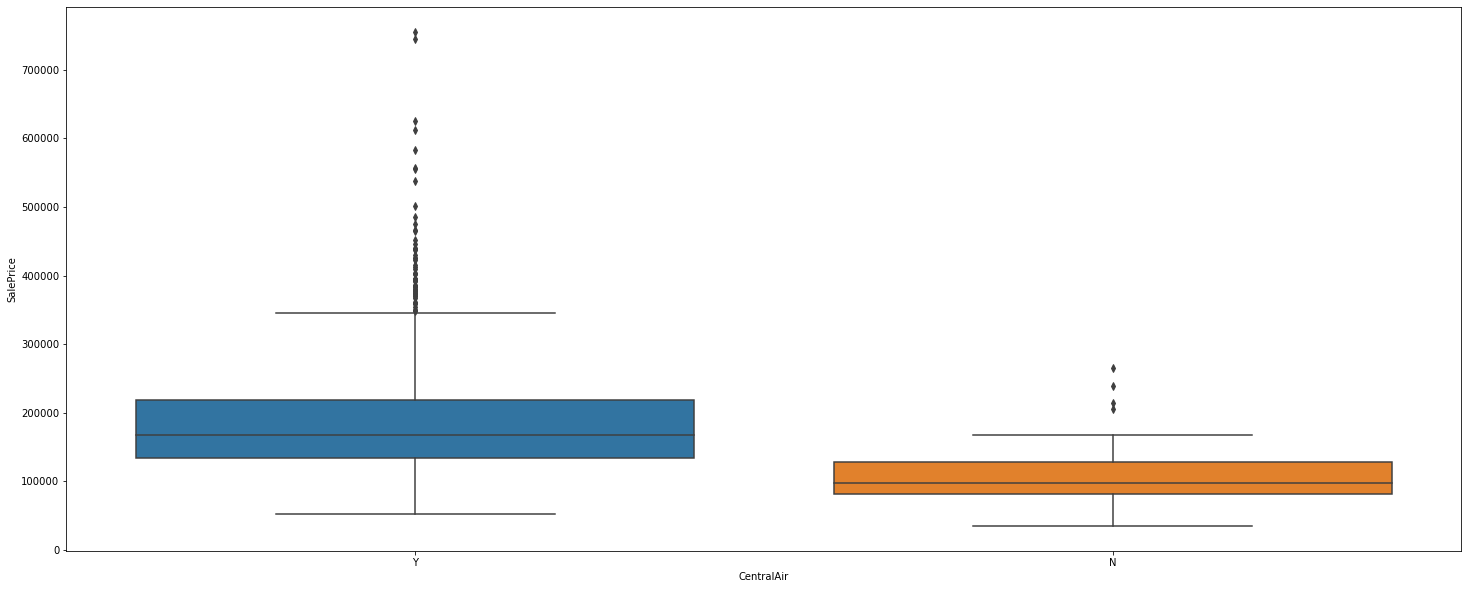

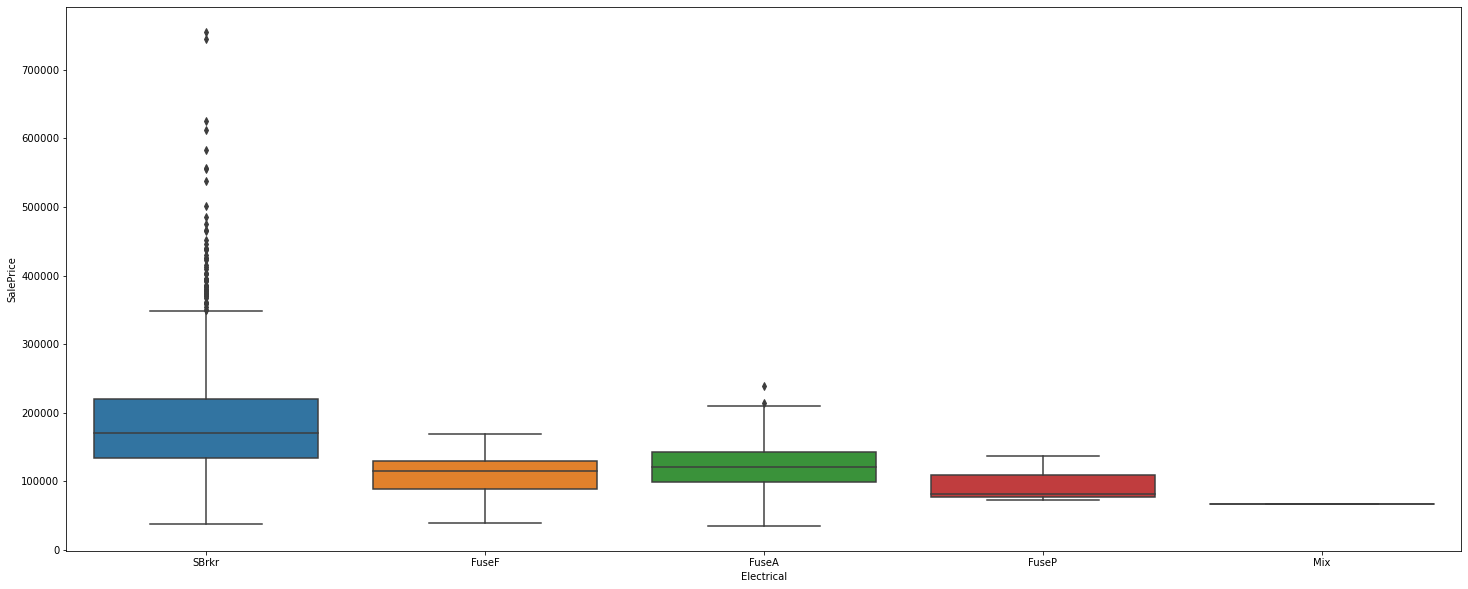

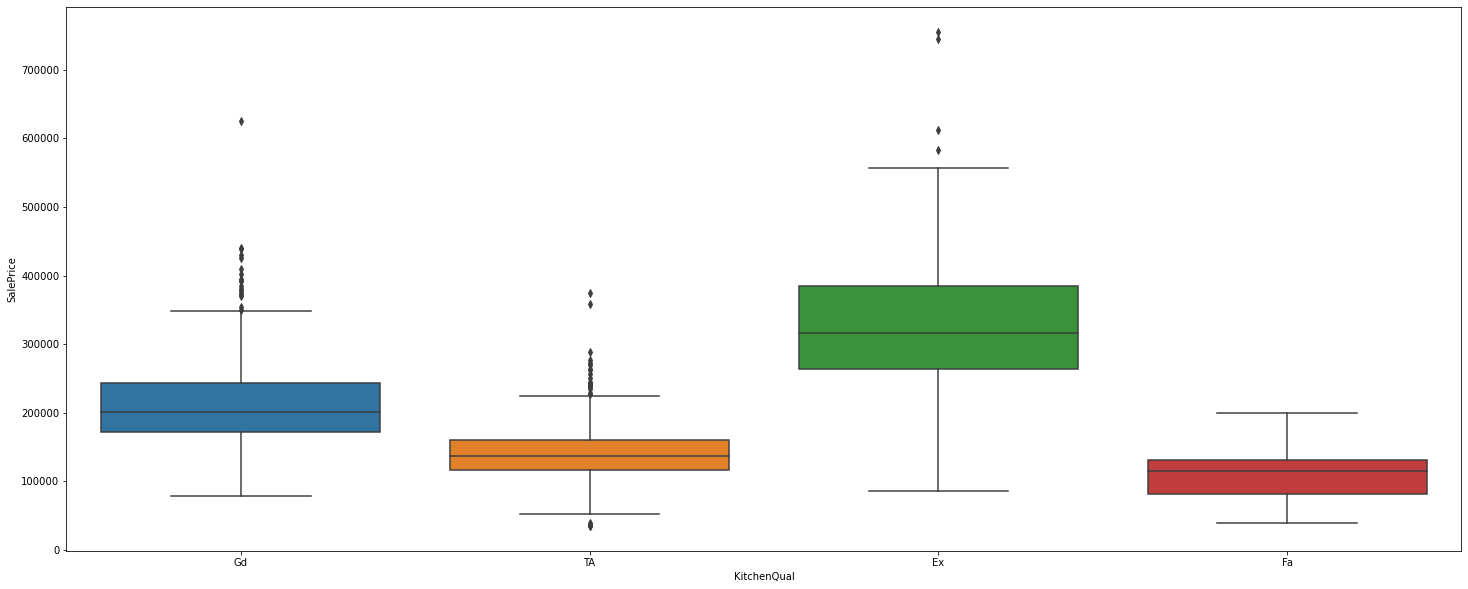

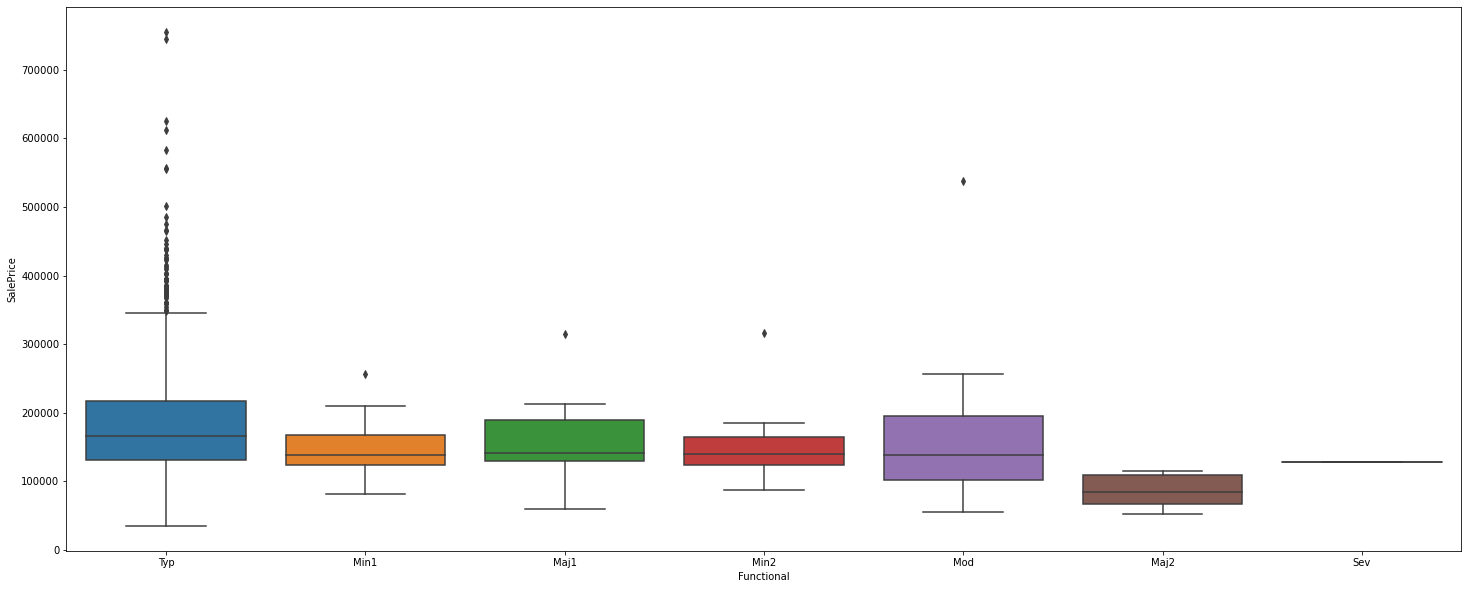

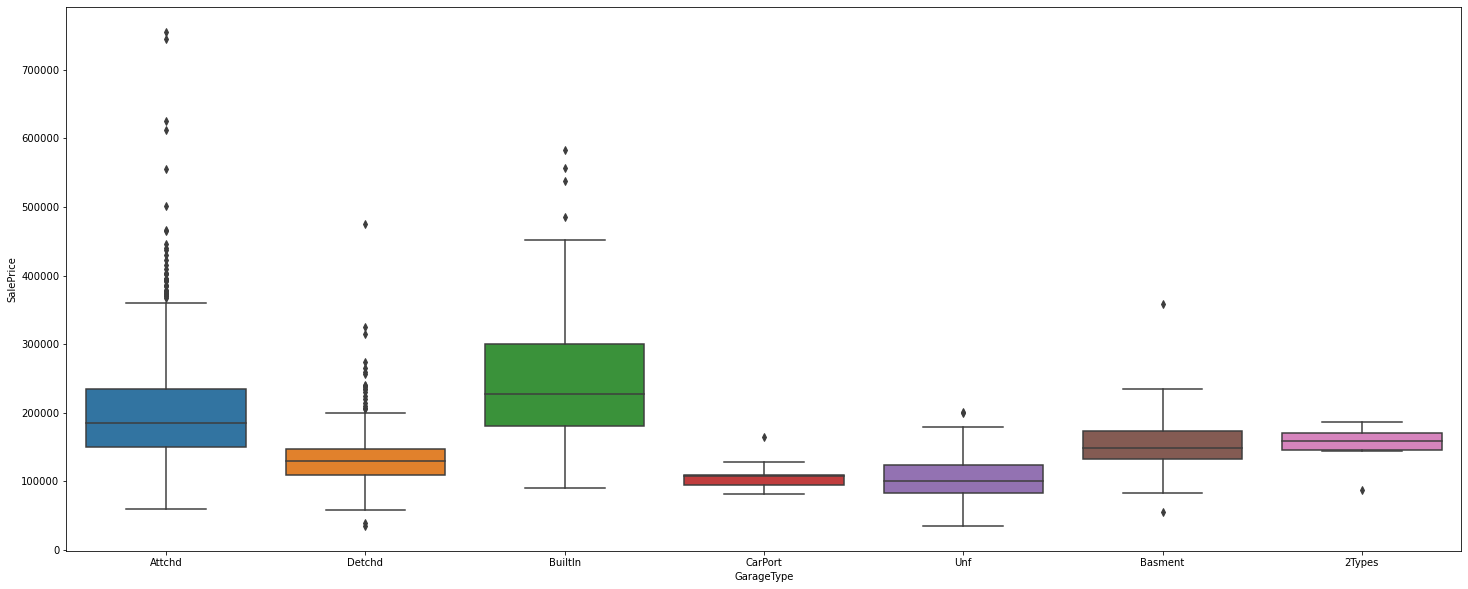

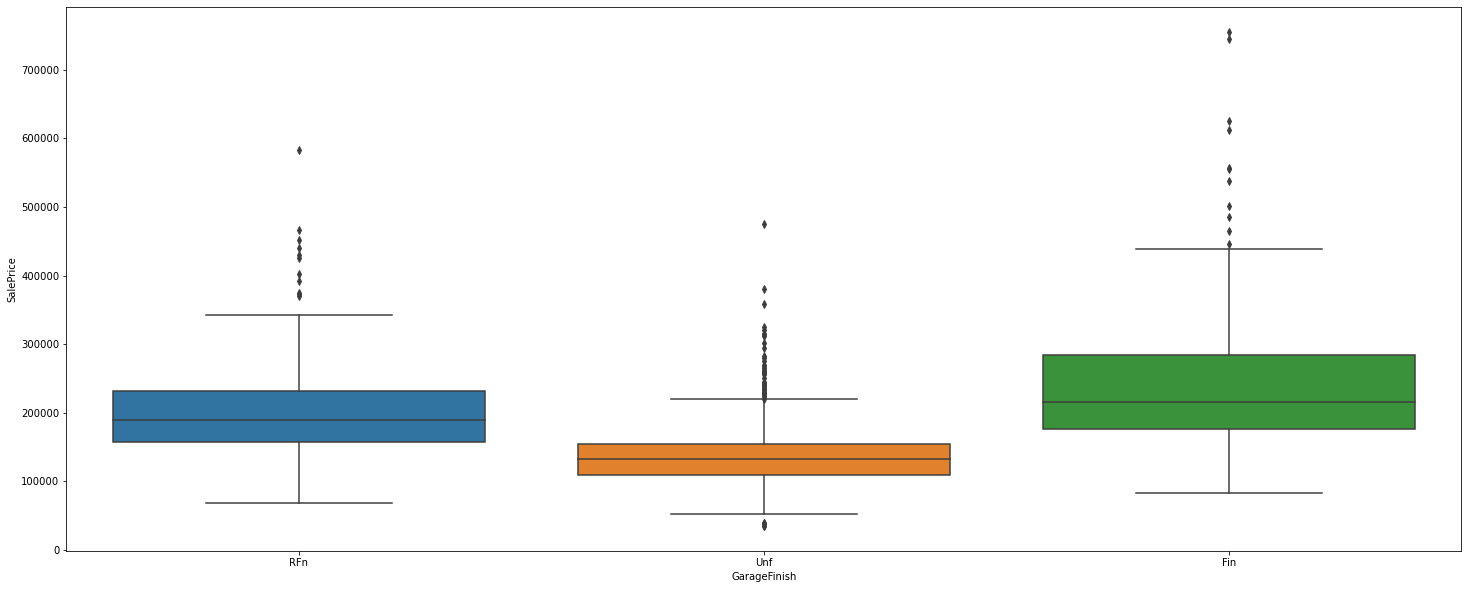

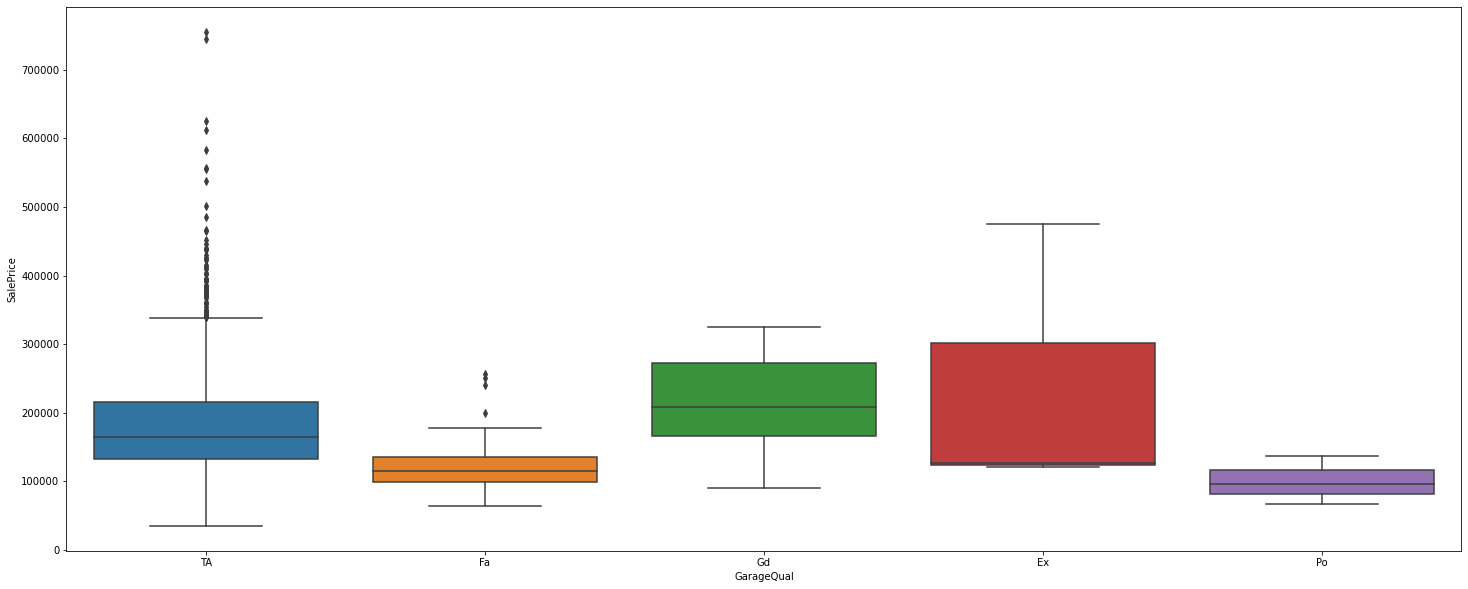

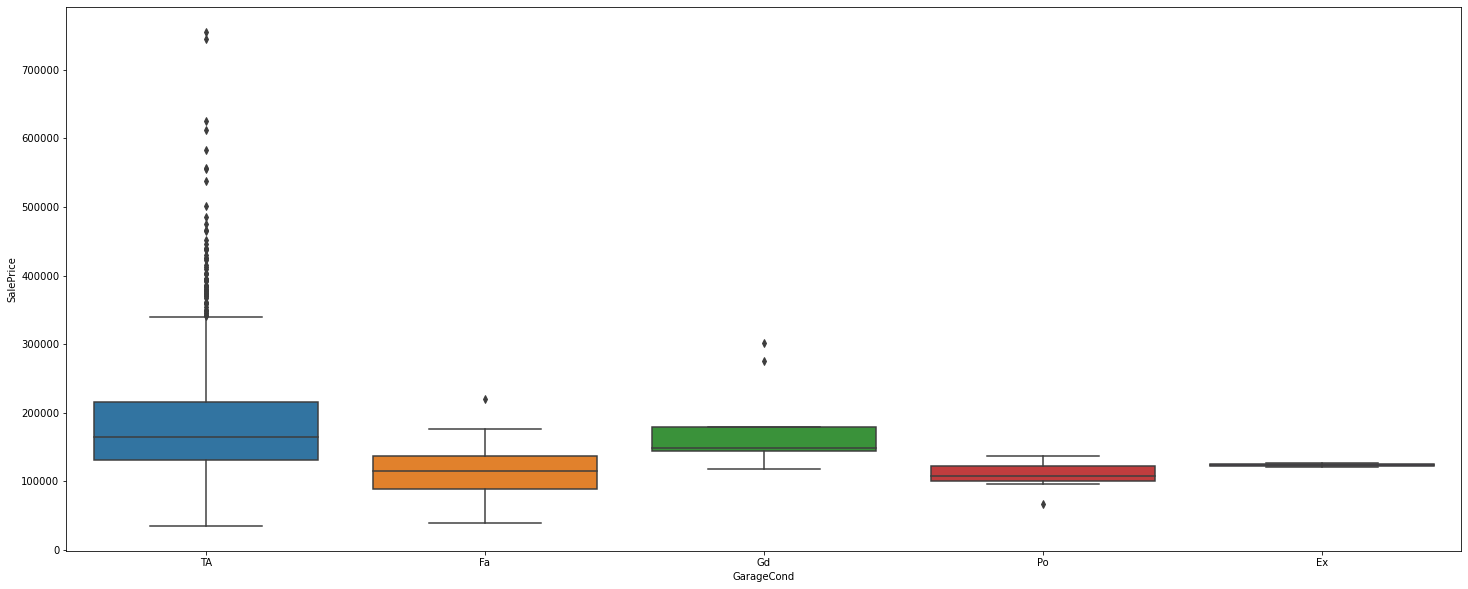

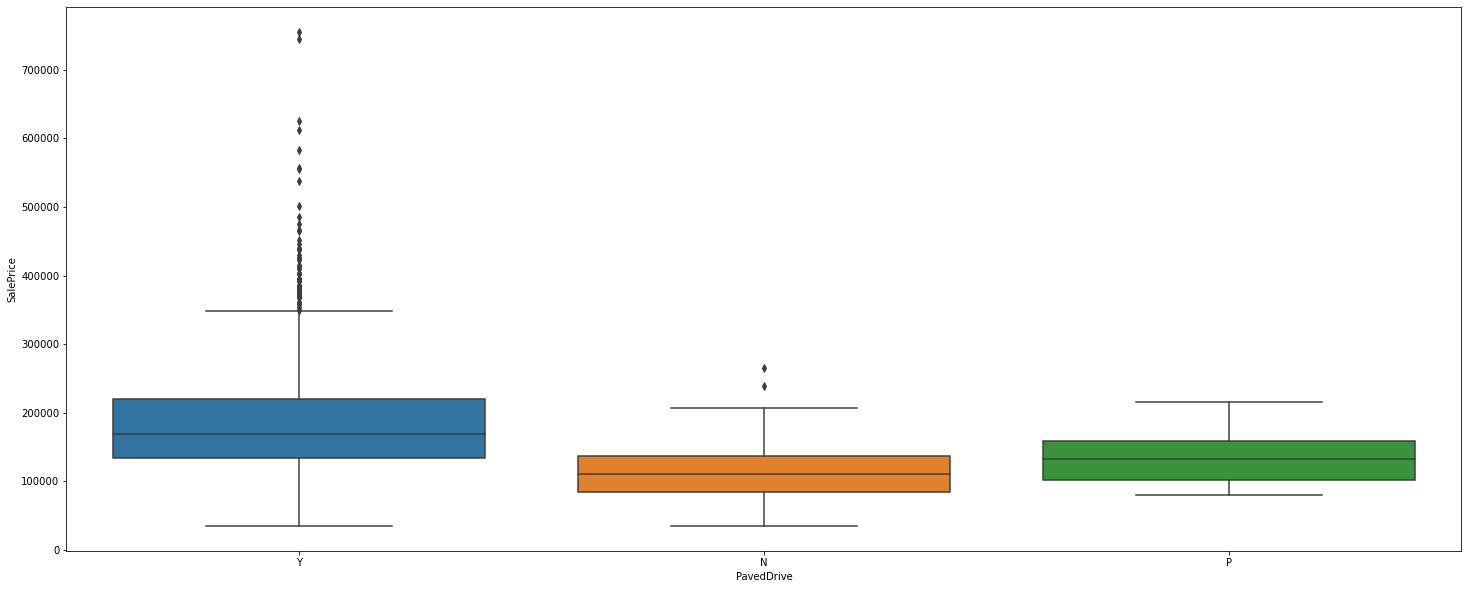

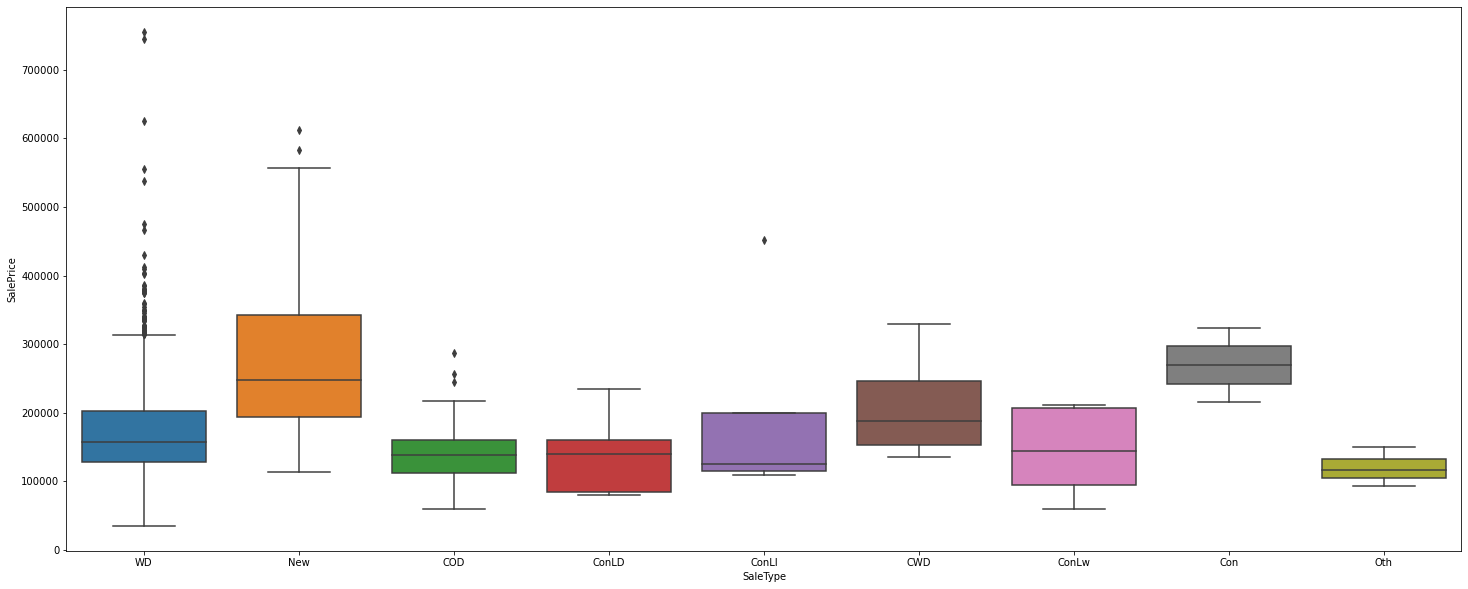

<Figure size 1800x720 with 0 Axes>

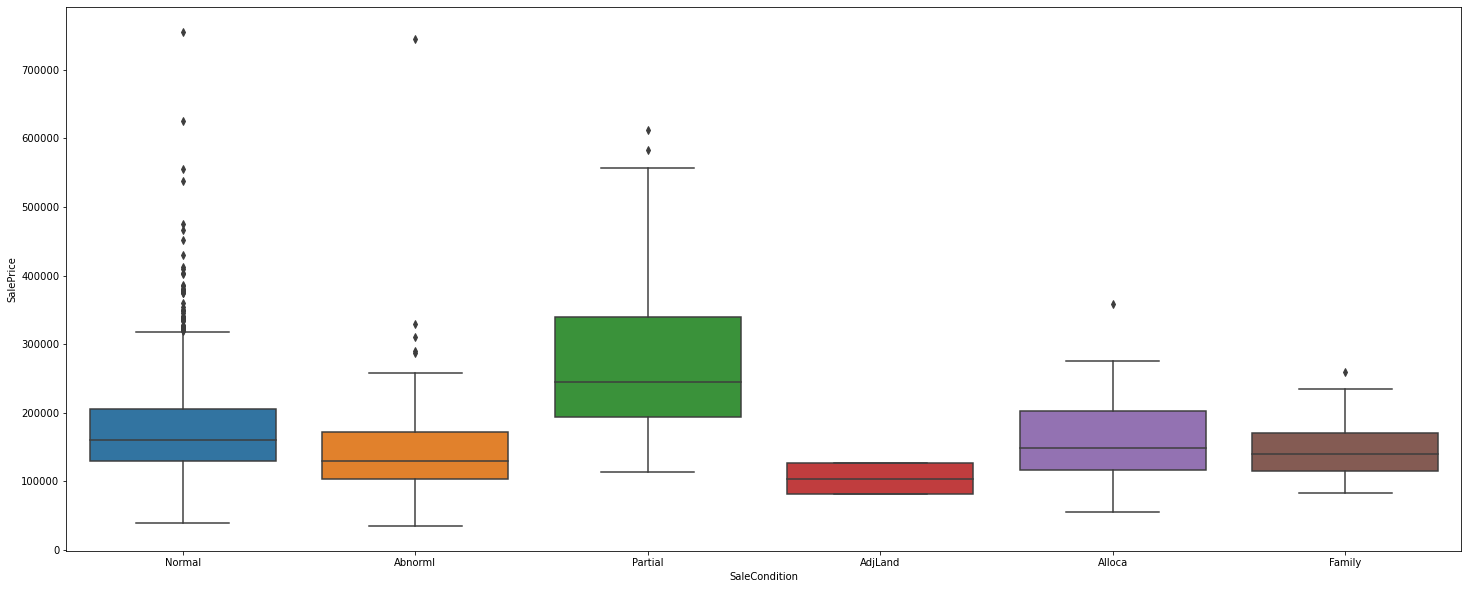

In [51]:
# Categorical columns

cat_cols = house_price.select_dtypes(include = np.object).columns.tolist()

for index, col in enumerate(cat_cols):
    plt.figure(figsize = (25,10))
    plt.figure(index)
    sns.boxplot(x = col, y = 'SalePrice', data = house_price[[col, 'SalePrice']])

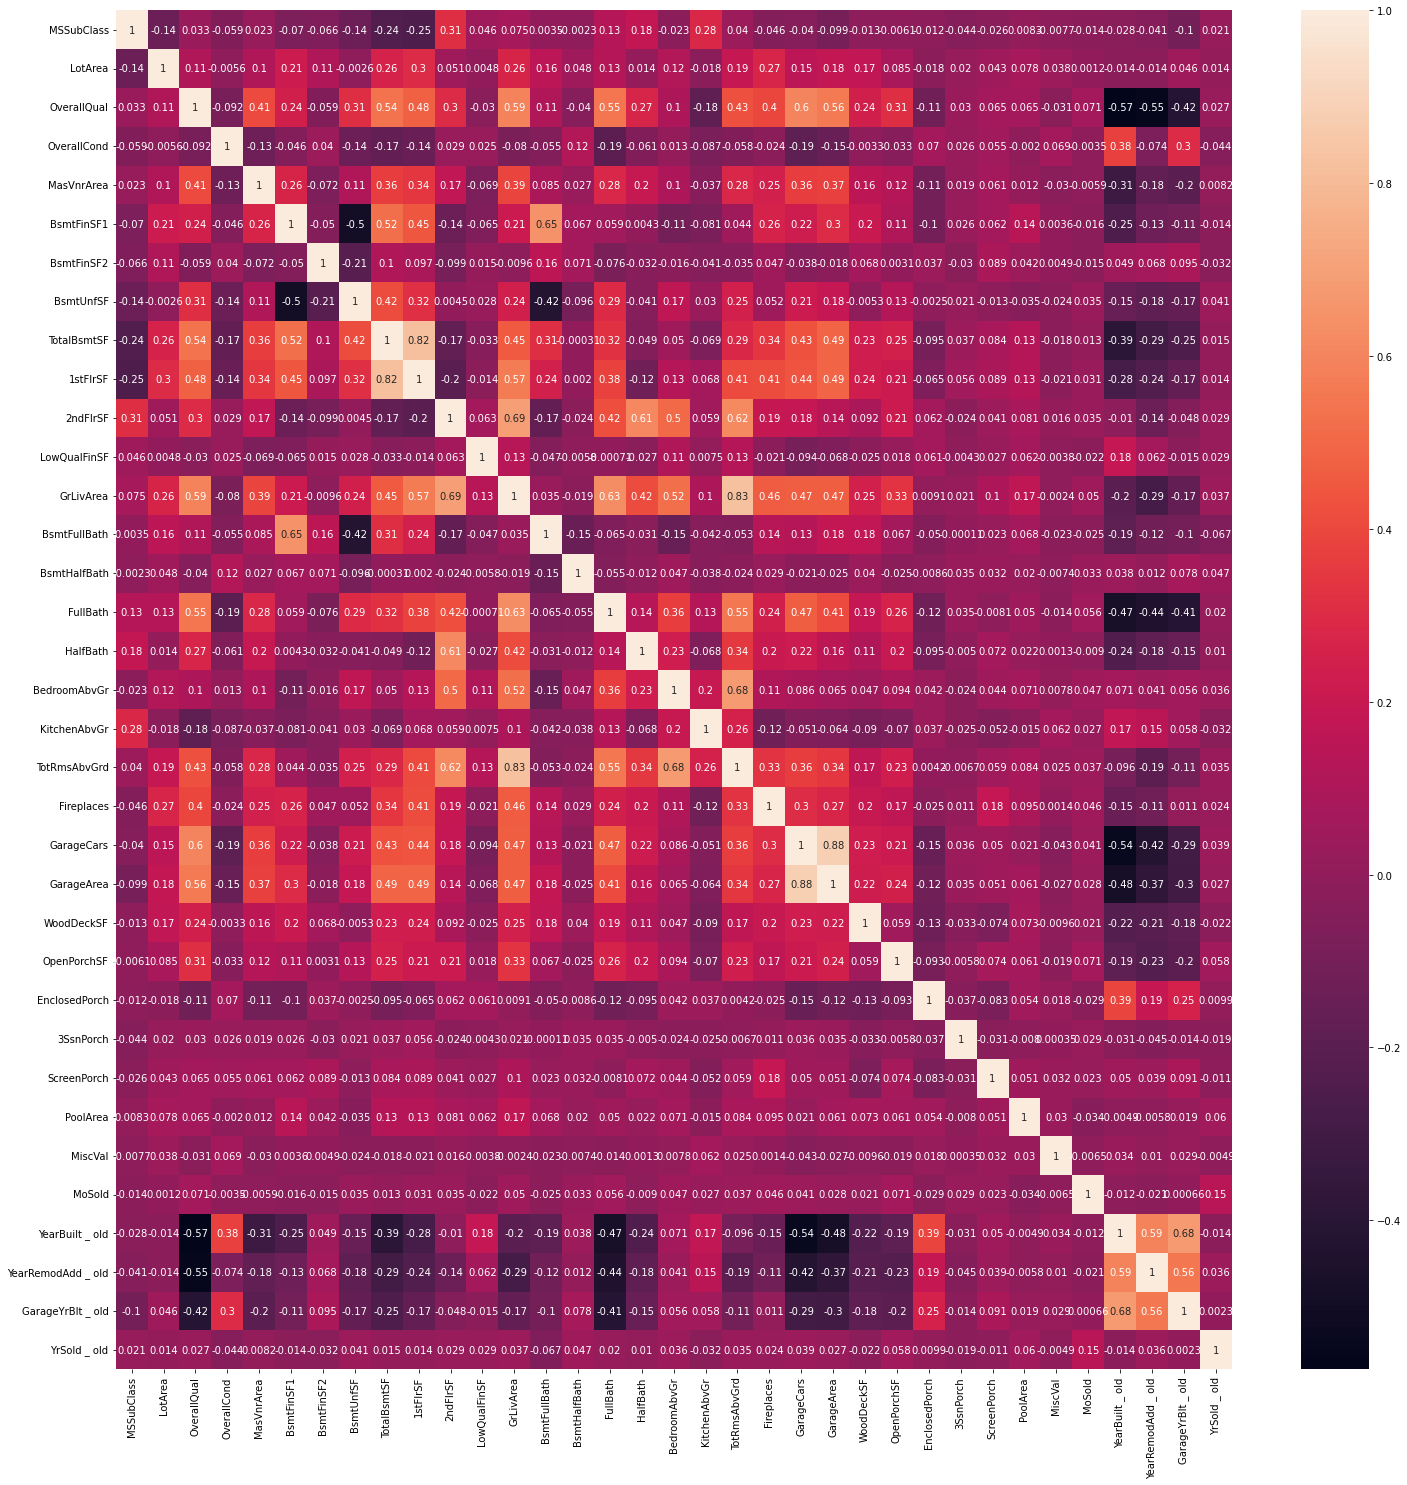

In [52]:
# HeatMap
plt.figure(figsize = (25,25))
sns.heatmap(house_price[num_cols].corr(), annot = True)
plt.show()

### 4. Preparing data for Model Building

In [53]:
# Lets drop the outliers in Numerical Columns

num_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YearBuilt _ old',
 'YearRemodAdd _ old',
 'GarageYrBlt _ old',
 'YrSold _ old']

In [54]:
# Took upper outliers as below 25% and upper outliers as above 99%

def removeOutliers(df, numb_columns):
    for col in numb_columns:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.99)
        IQR = Q3 - Q1
        df = df[(df[col] >= (Q1 - (1.5 * IQR))) & (df[col] <= (Q3 + (1.5 * IQR)))]
    return df

In [55]:
numb_columns = ['SalePrice', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
house_price = removeOutliers(house_price, numb_columns)

In [56]:
# Lets convert the categorical columns into numerical values

house_price[cat_cols].columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [57]:
categorical_columns = ['LotShape', 'LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'ExterCond', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond']

In [58]:
house_price[categorical_columns].head()

,LotShape,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,ExterCond,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond
0,Reg,Gtl,Gd,Gd,TA,No,GLQ,Unf,TA,Ex,Y,Gd,RFn,TA,TA
1,Reg,Gtl,TA,Gd,TA,Gd,ALQ,Unf,TA,Ex,Y,TA,RFn,TA,TA
2,IR1,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,TA,Ex,Y,Gd,RFn,TA,TA
3,IR1,Gtl,TA,TA,Gd,No,ALQ,Unf,TA,Gd,Y,Gd,Unf,TA,TA
4,IR1,Gtl,Gd,Gd,TA,Av,GLQ,Unf,TA,Ex,Y,Gd,RFn,TA,TA


In [59]:
house_price[categorical_columns[0]] = house_price[categorical_columns[0]].map({'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3})
house_price[categorical_columns[1]] = house_price[categorical_columns[1]].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})
house_price[categorical_columns[2]] = house_price[categorical_columns[2]].map({'Po': 0, 'Fa':1, 'TA': 2, 'Gd': 3, 'Ex': 4})
house_price[categorical_columns[3]] = house_price[categorical_columns[3]].map({'NA': 0, 'Po': 1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
house_price[categorical_columns[4]] = house_price[categorical_columns[4]].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
house_price[categorical_columns[5]] = house_price[categorical_columns[5]].map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
house_price[categorical_columns[6]] = house_price[categorical_columns[6]].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
house_price[categorical_columns[7]] = house_price[categorical_columns[7]].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
house_price[categorical_columns[8]] = house_price[categorical_columns[8]].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
house_price[categorical_columns[9]] = house_price[categorical_columns[9]].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
house_price[categorical_columns[10]] = house_price[categorical_columns[10]].map({'N':0, 'Y':1})
house_price[categorical_columns[11]] = house_price[categorical_columns[11]].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
house_price[categorical_columns[12]] = house_price[categorical_columns[12]].map({'NA': 0, 'Unf':1, 'RFn':2, 'Fin':3})
house_price[categorical_columns[13]] = house_price[categorical_columns[13]].map({'NA': 0, 'Po': 1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
house_price[categorical_columns[14]] = house_price[categorical_columns[14]].map({'NA': 0, 'Po': 1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [60]:
house_price[categorical_columns].head()

,LotShape,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,ExterCond,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond
0,3,0,3,4,3,1,6,1,2,4,1,3,2,3,3
1,3,0,2,4,3,4,5,1,2,4,1,2,2,3,3
2,0,0,3,4,3,2,6,1,2,4,1,3,2,3,3
3,0,0,2,3,4,1,5,1,2,3,1,3,1,3,3
4,0,0,3,4,3,3,6,1,2,4,1,3,2,3,3


In [61]:
# Creating Dummy Variables

dum_cols = pd.get_dummies(house_price[['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']], drop_first = True)
house_price = pd.concat([house_price, dum_cols], axis = 'columns')

In [62]:
# Lets drop the dummy Columns

house_price = house_price.drop(['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition'], axis = 'columns')

In [63]:
house_price.shape

(1441, 195)

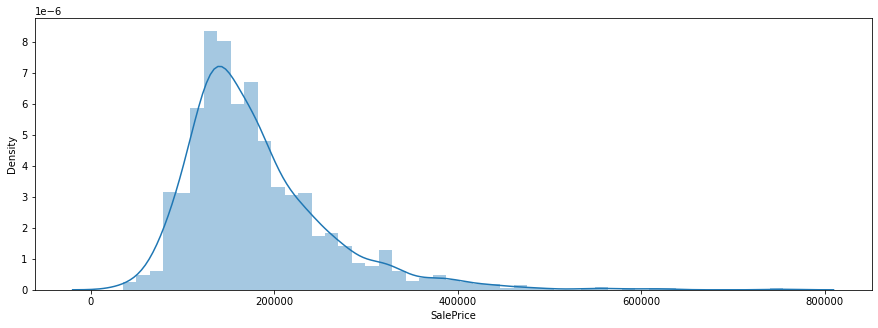

In [64]:
# Lets Check the distribution

plt.figure(figsize = (15,5))
sns.distplot(house_price.SalePrice)
plt.show()

### 5. Model Bulding

In [65]:
# lets Split the data

df_train, df_test = train_test_split(house_price, train_size = 0.7, test_size = 0.3, random_state = 50)

In [66]:
df_train.shape, df_test.shape

((1008, 195), (433, 195))

In [67]:
num_cols = house_price.select_dtypes(include = np.number).columns.tolist()
scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

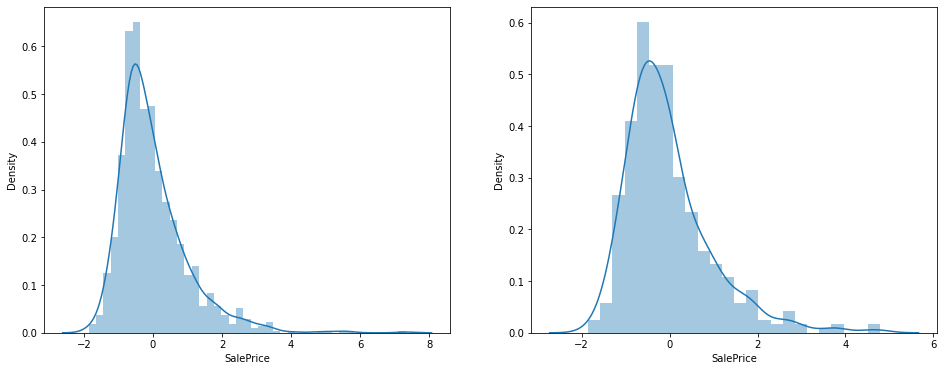

In [68]:
# Distribution after split

plt.figure(figsize = (16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)
plt.show()

In [69]:
# Lets train the model

y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [70]:
len(X_train.columns)

194

In [71]:
# lets get the optimal number of features using RFE

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,70)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [72]:
rfe_score = pd.DataFrame(list(zip(X_train.columns, rfe.support_,rfe.ranking_)))
rfe_score.columns = ['Column_Names', 'Status', 'Rank']

In [73]:
# Selected Variables

rfe_sel_columns = list(rfe_score[rfe_score.Status == True].Column_Names)
rfe_sel_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PoolArea',
 'YearBuilt _ old',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotConfig_CulDSac',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1Story',
 'RoofStyle_Shed',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_MetalSd',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_VinylSd

In [74]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [75]:
# Lasso Regression Model

lm = Lasso(alpha = 0.001)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true = y_train, y_pred = y_train_pred))

y_test_pred = lm.predict(X_test)
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.9086234810012512
0.9059297874965296


In [76]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
model_param = [round(x,3) for x in model_param]

col = df_train.columns
col.insert(0, 'Constant')
list(zip(col, model_param))

[('MSSubClass', 0.0),
 ('LotArea', -0.038),
 ('LotShape', 0.026),
 ('LandSlope', 0.155),
 ('OverallQual', 0.074),
 ('OverallCond', 0.079),
 ('MasVnrArea', 0.066),
 ('ExterQual', 0.066),
 ('ExterCond', 0.07),
 ('BsmtQual', 0.125),
 ('BsmtCond', 0.024),
 ('BsmtExposure', -0.0),
 ('BsmtFinType1', 0.057),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 0.05),
 ('BsmtFinSF2', -0.018),
 ('BsmtUnfSF', 0.309),
 ('TotalBsmtSF', -0.056),
 ('HeatingQC', -0.039),
 ('CentralAir', 0.04),
 ('1stFlrSF', 0.068),
 ('2ndFlrSF', 0.036),
 ('LowQualFinSF', 0.041),
 ('GrLivArea', 0.045),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', -0.07),
 ('FullBath', 0.068),
 ('HalfBath', 0.032),
 ('BedroomAbvGr', 0.065),
 ('KitchenAbvGr', 0.03),
 ('KitchenQual', 0.028),
 ('TotRmsAbvGrd', 0.029),
 ('Fireplaces', 0.037),
 ('GarageFinish', 0.04),
 ('GarageCars', 0.075),
 ('GarageArea', 0.111),
 ('GarageQual', 0.067),
 ('GarageCond', 0.034),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.116),
 ('EnclosedPorch', -0.053),
 ('3SsnPorch', -0.0

In [77]:
# Train and Test scores are quite similar, now lets imporove the model using GridSearchCV

folds = KFold(n_splits = 10, shuffle = True, random_state = 50)
hyper_param = {'alpha' : [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]}
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = hyper_param,
                        scoring = 'r2', cv = folds, verbose = 1,
                        return_train_score = True, n_jobs = -1)
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [78]:
cv_summary_1 = pd.DataFrame(model_cv.cv_results_)
cv_summary_1['param_alpha'] = cv_summary_1['param_alpha'].astype('float32')
cv_summary_1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.072108,0.005824,0.004601,0.001358,0.001,{'alpha': 0.001},0.843222,0.581284,0.914122,0.868286,...,0.907539,0.908329,0.908268,0.909132,0.921541,0.907774,0.904455,0.908994,0.910798,0.005376
1,0.016500,0.004503,0.003700,0.000641,0.010,{'alpha': 0.01},0.818923,0.664846,0.923465,0.852052,...,0.900140,0.900590,0.900533,0.901704,0.912594,0.900408,0.896361,0.900597,0.902950,0.005097
2,0.010300,0.001677,0.004800,0.000748,0.100,{'alpha': 0.1},0.749265,0.885010,0.888980,0.768631,...,0.814584,0.819355,0.815547,0.821696,0.844304,0.814836,0.807687,0.813591,0.819414,0.009511
3,0.008603,0.000918,0.004399,0.000663,1.000,{'alpha': 1.0},-0.070676,-0.009829,-0.001243,-0.049456,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.008300,0.001101,0.003799,0.000872,5.000,{'alpha': 5.0},-0.070676,-0.009829,-0.001243,-0.049456,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


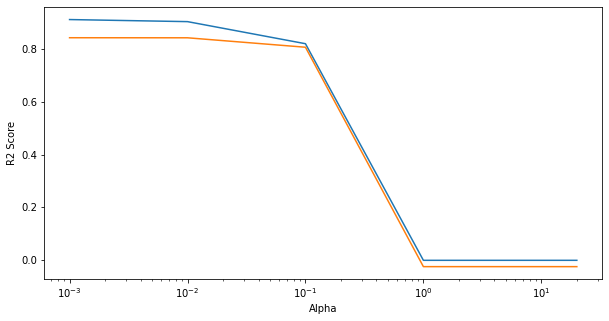

In [79]:
plt.figure(figsize = (10,5))
plt.plot(cv_summary_1['param_alpha'], cv_summary_1['mean_train_score'])
plt.plot(cv_summary_1['param_alpha'], cv_summary_1['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [80]:
# Alpha value

model_cv.best_params_

{'alpha': 0.001}

In [81]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

r2_score(y_true = y_train, y_pred = y_train_pred), r2_score(y_true = y_test, y_pred = y_test_pred)

(0.9086234810012512, 0.9059297874965296)

In [82]:
model_params = list(lasso.coef_)
model_params.insert(0, lasso.intercept_)
cols = df_train.columns
cols.insert(0, 'const')
lasso_coef = pd.DataFrame(list(zip(cols, model_params)))
lasso_coef.columns = ['Features', 'Coef']

In [83]:
lasso_coef.sort_values(by = 'Coef', ascending = False).head(10)

,Features,Coef
16,BsmtUnfSF,0.308627
3,LandSlope,0.154791
9,BsmtQual,0.124879
35,GarageArea,0.110765
68,Neighborhood_Gilbert,0.091487
5,OverallCond,0.079115
34,GarageCars,0.074952
4,OverallQual,0.073570
53,MSZoning_RM,0.070308
8,ExterCond,0.070264


In [84]:
# Ridge Regression Model

ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)

Ridge(alpha=0.001)

In [85]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.9091806378536409, 0.9028076013327031)

In [86]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 5)
hyper_param = {'alpha' : [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0, 10.0, 20.0]}
model = Ridge()

model_cv = GridSearchCV(estimator = model, param_grid = hyper_param, scoring = 'r2',
                          cv = folds, verbose = 1, n_jobs = -1, return_train_score = True)
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=5, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [87]:
cv_summary_r = pd.DataFrame(model_cv.cv_results_)
cv_summary_r['param_alpha'] = cv_summary_r['param_alpha'].astype('float32')
cv_summary_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.020300,0.007990,0.004901,0.001135,0.001,{'alpha': 0.001},0.864275,0.911220,0.880131,0.591620,...,0.911961,0.921786,0.910153,0.908126,0.909652,0.907523,0.916660,0.909147,0.911563,0.004269
1,0.010500,0.001912,0.004602,0.000800,0.010,{'alpha': 0.01},0.864276,0.911222,0.880131,0.591644,...,0.911961,0.921786,0.910153,0.908126,0.909652,0.907523,0.916660,0.909147,0.911563,0.004269
2,0.008901,0.001136,0.004100,0.000538,0.100,{'alpha': 0.1},0.864281,0.911241,0.880132,0.591879,...,0.911961,0.921786,0.910152,0.908126,0.909652,0.907523,0.916660,0.909146,0.911563,0.004269
3,0.008303,0.001102,0.003699,0.000786,0.200,{'alpha': 0.2},0.864286,0.911261,0.880134,0.592139,...,0.911961,0.921786,0.910151,0.908126,0.909652,0.907523,0.916660,0.909146,0.911562,0.004269
4,0.009002,0.001265,0.004500,0.000922,0.500,{'alpha': 0.5},0.864301,0.911323,0.880139,0.592913,...,0.911959,0.921784,0.910143,0.908125,0.909650,0.907522,0.916658,0.909145,0.911560,0.004269


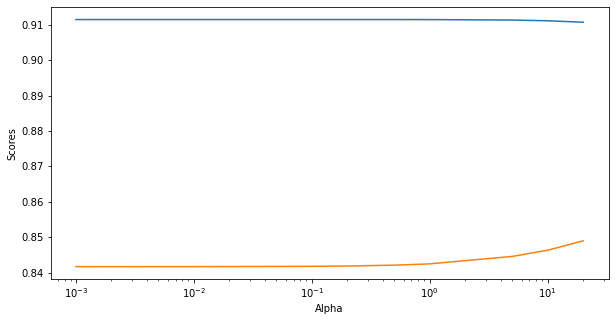

In [88]:
plt.figure(figsize = (10,5))
plt.plot(cv_summary_r['param_alpha'], cv_summary_r['mean_train_score'])
plt.plot(cv_summary_r['param_alpha'], cv_summary_r['mean_test_score'])
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Scores')
plt.show()

In [89]:
# Alpha Value

model_cv.best_params_

{'alpha': 20.0}

In [90]:
ridge = Ridge(alpha = 20.0)
ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)

(0.9085722907687485, 0.9056278920890867)

In [91]:
model_params = list(ridge.coef_)
model_params.insert(0, ridge.intercept_)
cols = df_train.columns
cols.insert(0, 'constant')
ridge_coef = pd.DataFrame(list(zip(cols, model_params)))
ridge_coef.columns = ['Features', 'Coef']

In [92]:
ridge_coef.sort_values(by = 'Coef', ascending = False).head(10)

,Features,Coef
16,BsmtUnfSF,0.181683
3,LandSlope,0.149842
14,BsmtFinType2,0.144093
35,GarageArea,0.108703
9,BsmtQual,0.097136
68,Neighborhood_Gilbert,0.091250
13,BsmtFinSF1,0.083073
12,BsmtFinType1,0.082763
5,OverallCond,0.079568
34,GarageCars,0.075980


In [93]:
# Final Model

lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.9086234810012512, 0.9059297874965296)